# EDA SALES

In [2]:
# Importar librarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importar ficheiro

file_path = "C:/Users/jpgro/OneDrive/PG_Analitics_Data_Science/Projeto 2/data/sales.csv"
df_sales = pd.read_csv(file_path)

C:\Users\jpgro\AppData\Local\Temp\ipykernel_15236\1270968893.py:4: DtypeWarning: Columns (11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv(file_path)


## Visão geral dos dados


In [3]:
# Info Geral + Primeiras linhas
df_sales.info()

print("\n---------")
print(df_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886058 entries, 0 to 8886057
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   store_id               object 
 2   product_id             object 
 3   date                   object 
 4   sales                  float64
 5   revenue                float64
 6   stock                  float64
 7   price                  float64
 8   promo_type_1           object 
 9   promo_bin_1            object 
 10  promo_type_2           object 
 11  promo_bin_2            object 
 12  promo_discount_2       float64
 13  promo_discount_type_2  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 949.1+ MB

---------
   Unnamed: 0 store_id product_id        date  sales  revenue  stock  price  \
0           1    S0002      P0001  2017-01-02    0.0     0.00    8.0   6.25   
1           2    S0002      P0005  2017-01-02    0.0     0.00   11.0  33.90   

A Info do Business é que os dados são registos históricos de vendas, por dia.  
É necessário verificar , então, se há valores duplicados de produtos a serem vendidos na mesma loja, no mesmo dia.

In [39]:
# count lojas
print(df_sales['store_id'].unique().shape[0])

63


In [46]:
# count produtos
print(df_sales['product_id'].unique().shape[0])

600


In [4]:
# Verificar duplicados: ver se há vendas do mesmo produto, na mesma loja no mesmo dia
print(df_sales.duplicated(subset=['store_id', 'product_id', 'date']).sum())

# Não há duplicados.

0


In [5]:
# Verificar se todas as lojas têm registos todos os dias
print("\n---------")
print(df_sales.groupby('store_id')['date'].nunique())




---------
store_id
S0002    1033
S0003    1033
S0005     638
S0007     219
S0010    1033
         ... 
S0132    1033
S0136     341
S0141    1033
S0142    1033
S0143    1033
Name: date, Length: 63, dtype: int64



---------
date
1033    51
638      1
219      1
623      1
601      1
882      1
581      1
503      1
1032     1
594      1
457      1
419      1
341      1
Name: count, dtype: int64


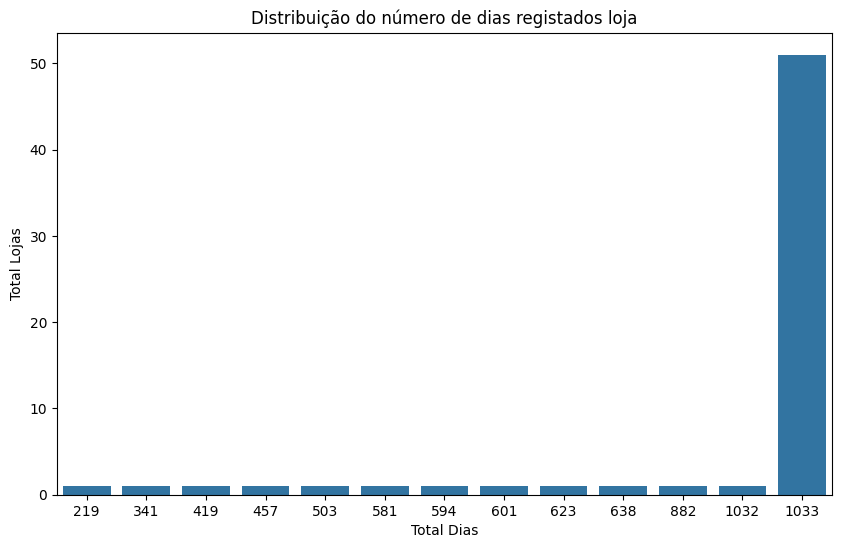

In [8]:
# Contar o número de lojas por dias de registo e mostrar a distribuição
print("\n---------")
print(df_sales.groupby('store_id')['date'].nunique().value_counts())
# Plotar a distribuição do número de dias de registo por loja
plt.figure(figsize=(10, 6))
plt.title('Distribuição do número de dias registados loja')
plt.xlabel('Total Dias')
plt.ylabel('Total Lojas')
sns.countplot(x=df_sales.groupby('store_id')['date'].nunique())
plt.savefig('lojas_dias_unicos.png', transparent=True, dpi=300)


In [ ]:
# total combinações produto-loja
print("\n---------")
print(df_sales.groupby(['store_id', 'product_id']).size().reset_index(name='count').shape[0])



---------
17037

---------
False


## Alteração de tipos de dados
- Coluna date para datetype, pois queremos fazer uma manipulação dos dados e treino/modelação do modelo com base temporal, pois é o que melhor responde ao problema do negócio.

In [7]:
df_sales['date'] = pd.to_datetime(df_sales['date'], errors='coerce')

print(df_sales['date'].dtype)

datetime64[ns]


In [7]:
# Verificar amplitude temporal
print(df_sales['date'].head())
print(df_sales['date'].tail())

0   2017-01-02
1   2017-01-02
2   2017-01-02
3   2017-01-02
4   2017-01-02
Name: date, dtype: datetime64[ns]
8886053   2019-10-31
8886054   2019-10-31
8886055   2019-10-31
8886056   2019-10-31
8886057   2019-10-31
Name: date, dtype: datetime64[ns]


In [12]:
# 2. Extrai só a componente de data (sem hora)
df_sales['date_only'] = df_sales['date'].dt.date

# 3. Filtra só a loja S0002
s2 = df_sales[df_sales['store_id'] == 'S0058']

# 4. Agrupa por dia e conta products únicos
prod_por_dia = (
    s2
    .groupby('date_only')['product_id']
    .nunique()
    .reset_index(name='n_products')
)

print(prod_por_dia)

# 2. Agora calcula a frequência de cada contagem de produtos:
freq_por_count = (
    prod_por_dia
      .groupby('n_products')['date_only']
      .count()
      .reset_index(name='n_days')
      .sort_values('n_products'))

print(freq_por_count)

       date_only  n_products
0     2017-01-02         116
1     2017-01-03         114
2     2017-01-04         112
3     2017-01-05         114
4     2017-01-06         113
...          ...         ...
1028  2019-10-27         127
1029  2019-10-28         129
1030  2019-10-29         128
1031  2019-10-30         130
1032  2019-10-31         129

[1033 rows x 2 columns]
    n_products  n_days
0          100       1
1          101       2
2          102       1
3          104       1
4          105       1
5          108       1
6          109       1
7          110       1
8          112       4
9          113       3
10         114       8
11         115      10
12         116      10
13         117      17
14         118      26
15         119      17
16         120      32
17         121      21
18         122      28
19         123      28
20         124      18
21         125       6
22         126      14
23         127      19
24         128      20
25         129      27
26    

In [8]:
# Missing Values por coluna + peso na coluna
print(df_sales.isnull().sum())
print("\n------------------------")
print(round(df_sales.isnull().sum() / len(df_sales) * 100),0)

Unnamed: 0                     0
store_id                       0
product_id                     0
date                           0
sales                     302296
revenue                   302296
stock                     302296
price                      91381
promo_type_1                   0
promo_bin_1              7653515
promo_type_2                   0
promo_bin_2              8873337
promo_discount_2         8873337
promo_discount_type_2    8873337
dtype: int64

------------------------
Unnamed: 0                 0.0
store_id                   0.0
product_id                 0.0
date                       0.0
sales                      3.0
revenue                    3.0
stock                      3.0
price                      1.0
promo_type_1               0.0
promo_bin_1               86.0
promo_type_2               0.0
promo_bin_2              100.0
promo_discount_2         100.0
promo_discount_type_2    100.0
dtype: float64 0


<function matplotlib.pyplot.show(close=None, block=None)>

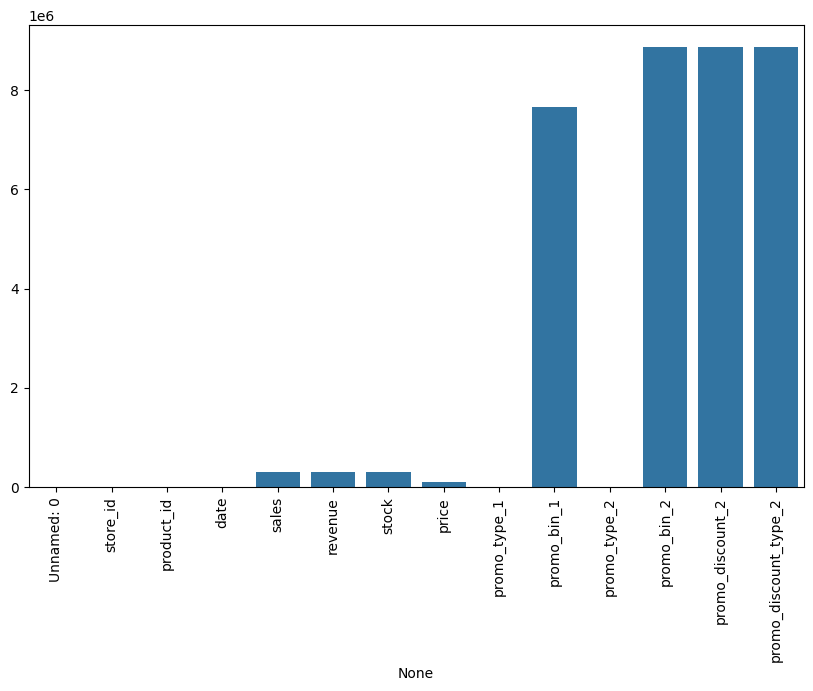

In [102]:
# Gráfico com Missing Values por coluna e peso na coluna
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x=df_sales.isnull().sum().index, y=df_sales.isnull().sum().values)
plt.savefig('missing_values.png', transparent=True, dpi=300)
plt.show


- Colunas que precisam de ser inspecionadas para perceber o que fazer com os valores nulos: sales,revenue,stock,price,promo_bin_1.  
- Colunas a descartar na fase seguinte (Data Preparation) pela sua quantidade de nulos: promo_bin_2, promo_discount_2, promo_discount_type_2.

## Valores Nulos
### Sales

In [ ]:
# perceber se os nulos em sales estão relacionados com produtos específicos
print(df_sales[df_sales['sales'].isnull()]['product_id'].value_counts())

product_id
P0663    1921
P0261    1919
P0499    1910
P0333    1910
P0664    1909
         ... 
P0053       4
P0076       2
P0547       2
P0316       2
P0231       1
Name: count, Length: 562, dtype: int64


- 562 produtos com nulos, sem relação

In [ ]:
# perceber se os nulos estão relacionados com lojas específicas
print(df_sales[df_sales['sales'].isnull()]['store_id'].value_counts())

store_id
S0038    11421
S0085    11340
S0104     9343
S0097     9123
S0094     9102
         ...  
S0080     1748
S0099     1680
S0016     1675
S0076     1487
S0041     1100
Name: count, Length: 62, dtype: int64


- 62 lojas com valores nulos, sem relação

In [ ]:
# perceber se os valores nulos estão relacionados com promoções
print(df_sales[df_sales['sales'].isnull()]['promo_bin_1'].value_counts())

promo_bin_1
verylow     16585
low         12092
moderate     9470
high         8579
veryhigh     3798
Name: count, dtype: int64


- todas as promoções têm valores nulos, sem relação

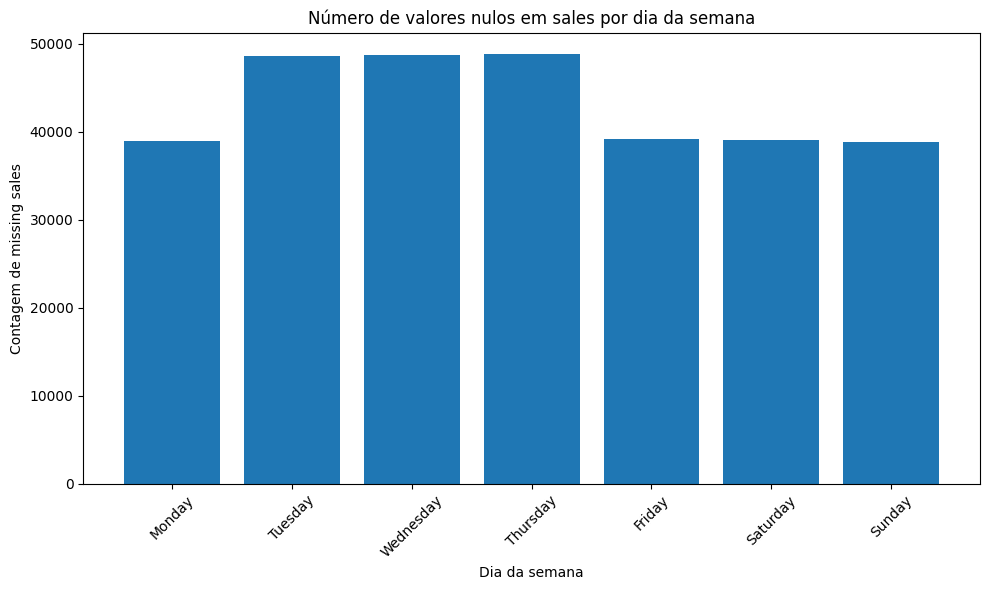

In [ ]:
# Filtrar linhas com sales nulo
df_null = df_sales[df_sales['sales'].isnull()].copy()

# Converter a coluna date em datetime e extrair o dia da semana
df_null['date'] = pd.to_datetime(df_null['date'], errors='coerce')

# Contar ocorrências por dia da semana, ordenando de segunda a domingo
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts = df_null['weekday'].value_counts().reindex(weekday_order)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.title('Número de valores nulos em sales por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Contagem de missing sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# perceber se os valores nulos estão relacionados com que datas específicas
print(df_sales[df_sales['sales'].isnull()]['date'].value_counts())


date
2019-10-12    9819
2019-10-11    9818
2019-10-04    9816
2019-10-10    9805
2019-10-09    9797
2019-10-19    9797
2019-10-03    9791
2019-10-17    9773
2019-10-14    9767
2019-10-24    9766
2019-10-13    9764
2019-10-18    9764
2019-10-02    9761
2019-10-08    9759
2019-10-16    9757
2019-10-07    9753
2019-10-25    9749
2019-10-15    9748
2019-10-05    9747
2019-10-23    9747
2019-10-21    9741
2019-10-26    9739
2019-10-22    9739
2019-10-20    9716
2019-10-27    9714
2019-10-06    9713
2019-10-28    9701
2019-10-29    9694
2019-10-01    9693
2019-10-31    9681
2019-10-30    9667
Name: count, dtype: int64


- parece haver um padrão em que os valores nulos estão todos concentrados no mês de Outubro de 2019, que é o último mês do dataset.


In [ ]:
# vamos perceber a % de peso que os valores nulos de Outubro de 2019 têm nos valores nulos do dataset
df_sales_october = df_sales[df_sales['date'].dt.month == 10]
print(round(df_sales_october.isnull().sum() / df_sales.isnull().sum() * 100, 2))

Unnamed: 0                  NaN
store_id                    NaN
product_id                  NaN
date                        NaN
sales                    100.00
revenue                  100.00
stock                    100.00
price                      5.50
promo_type_1                NaN
promo_bin_1                9.40
promo_type_2                NaN
promo_bin_2                9.28
promo_discount_2           9.28
promo_discount_type_2      9.28
dtype: float64


- Fica claro que os valores nulos em sales,revenue e stock estão concentrados no úlitmo mês de dados do dataset. <b>Desta forma vamos eliminar todas as linhas deste mês no dataset.</b>  
- sales, revenue e stock está feita a sua inspeção de nulos

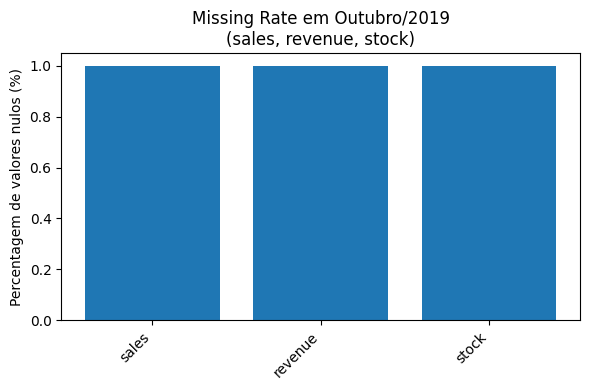

In [25]:

# 1. Garantir datetime
df_sales['date'] = pd.to_datetime(df_sales['date'], errors='coerce')

# 2. Filtrar Outubro/2019
oct19 = df_sales[df_sales['date'].dt.to_period('M') == '2019-10']

# 3. Calcular % de nulos só para sales, revenue e stock
cols = ['sales', 'revenue', 'stock']
pct_nulls_oct19 = (oct19[cols].isnull().sum() / len(oct19)).reindex(cols)

# 4. Plotar
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(pct_nulls_oct19.index, pct_nulls_oct19.values)


# 6. Ajustes visuais
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Percentagem de valores nulos (%)')
ax.set_title('Missing Rate em Outubro/2019\n(sales, revenue, stock)')
plt.tight_layout()
plt.savefig('missing_rate_october_2019.png', transparent=True, dpi=300)
plt.show()



In [13]:
# Mantém só datas anteriores a 2019-10-01
df_sales = df_sales[df_sales['date'] < '2019-10-01']

print(df_sales.tail())

         Unnamed: 0 store_id product_id       date  sales  revenue  stock  \
8583757     8583758    S0143      P0694 2019-09-30    0.0      0.0    7.0   
8583758     8583759    S0143      P0709 2019-09-30    0.0      0.0    7.0   
8583759     8583760    S0143      P0711 2019-09-30    0.0      0.0    5.0   
8583760     8583761    S0143      P0718 2019-09-30    0.0      0.0   14.0   
8583761     8583762    S0143      P0747 2019-09-30    0.0      0.0    3.0   

         price promo_type_1 promo_bin_1 promo_type_2 promo_bin_2  \
8583757   7.50         PR14         NaN         PR03         NaN   
8583758   7.00         PR12     verylow         PR03         NaN   
8583759  12.90         PR14         NaN         PR03         NaN   
8583760  23.75         PR14         NaN         PR03         NaN   
8583761  21.90         PR14         NaN         PR03         NaN   

         promo_discount_2 promo_discount_type_2   date_only  
8583757               NaN                   NaN  2019-09-30  
8583

In [15]:
file_path_2 = "C:/Users/jpgro/OneDrive/PG_Analitics_Data_Science/Projeto 2/data/product.csv"
df_products = pd.read_csv(file_path_2)

In [16]:
import pandas as pd

# 1) Faz o merge para trazer cluster_id para cada venda
df_merged = df_sales.merge(
    df_products[['product_id','cluster_id']],
    on='product_id',
    how='left'
)

# 2) Número total de clusters distintos (incluíndo NaN, se houver)
n_clusters_distintos = df_merged['cluster_id'].nunique(dropna=False)
print(f"Total de clusters (incluindo NaN): {n_clusters_distintos}")

# 3) Contagem de ocorrências de cada cluster_id
contagem_por_cluster = df_merged['cluster_id'].value_counts(dropna=False).reset_index()
contagem_por_cluster.columns = ['cluster_id','n_vendas']
print("\nVendas por cluster_id:")
print(contagem_por_cluster)


Total de clusters (incluindo NaN): 10

Vendas por cluster_id:
  cluster_id  n_vendas
0  cluster_0   4853382
1  cluster_9    779329
2  cluster_3    606403
3  cluster_4    598557
4  cluster_6    395025
5  cluster_8    349865
6  cluster_7    285589
7  cluster_5    277714
8  cluster_2    262488
9  cluster_1    175410


In [17]:
import pandas as pd

# Lista de product_id a verificar
target_ids = ['P0000', 'P0013', 'P0023', 'P0040', 'P0056', 'P0074', 'P0086',
              'P0118', 'P0123', 'P0133', 'P0139', 'P0199', 'P0200', 'P0230',
              'P0235', 'P0250', 'P0253', 'P0292', 'P0303', 'P0319', 'P0323',
              'P0334', 'P0357', 'P0365', 'P0367', 'P0368', 'P0380', 'P0385',
              'P0387', 'P0401', 'P0407', 'P0409', 'P0410', 'P0430', 'P0443',
              'P0447', 'P0478', 'P0486', 'P0519', 'P0564', 'P0568', 'P0580',
              'P0596', 'P0604', 'P0607', 'P0636', 'P0719', 'P0722', 'P0727',
              'P0744']

# Verifica presença de cada ID em df_sales
present = pd.DataFrame({'product_id': target_ids})
present['in_sales'] = present['product_id'].isin(df_sales['product_id'])

# Listas de IDs presentes e ausentes
present_ids = present[present['in_sales']==True]['product_id'].tolist()
missing_ids = present[present['in_sales']==False]['product_id'].tolist()

# Resultados
print("=== Presente em sales_df ===")
print(present_ids)
print("\n=== Ausente em sales_df ===")
print(missing_ids)


=== Presente em sales_df ===
[]

=== Ausente em sales_df ===
['P0000', 'P0013', 'P0023', 'P0040', 'P0056', 'P0074', 'P0086', 'P0118', 'P0123', 'P0133', 'P0139', 'P0199', 'P0200', 'P0230', 'P0235', 'P0250', 'P0253', 'P0292', 'P0303', 'P0319', 'P0323', 'P0334', 'P0357', 'P0365', 'P0367', 'P0368', 'P0380', 'P0385', 'P0387', 'P0401', 'P0407', 'P0409', 'P0410', 'P0430', 'P0443', 'P0447', 'P0478', 'P0486', 'P0519', 'P0564', 'P0568', 'P0580', 'P0596', 'P0604', 'P0607', 'P0636', 'P0719', 'P0722', 'P0727', 'P0744']


In [18]:
# 1. Merge trazendo todas as colunas de df_products
df_merged = df_sales.merge(
    df_products,
    on='product_id',
    how='left'
)

# 2. Contar nulos em cada dimensão
null_counts = (
    df_merged[['product_length', 'product_width', 'product_depth']]
    .isna()
    .sum()
    .reset_index()
)
null_counts.columns = ['column', 'n_nulls']

# (Opcional) percentagem de nulos no merge
total_rows = len(df_merged)
null_counts['pct_null'] = (null_counts['n_nulls'] / total_rows * 100).round(2)

print(null_counts)


           column  n_nulls  pct_null
0  product_length    37185      0.43
1   product_width    35270      0.41
2   product_depth    35270      0.41


### Price

In [105]:
# perceber quais os produtos com valores nulos
print(df_sales[df_sales['price'].isnull()]['product_id'].value_counts())

product_id
P0501    3660
P0269    3104
P0549    2834
P0426    2720
P0373    1175
         ... 
P0240       3
P0634       3
P0176       1
P0691       1
P0155       1
Name: count, Length: 314, dtype: int64


- 318 produtos com transações com valores nulos, sem relação

In [ ]:
# Vamos agora perceber se conseguimos substituir os valores nulos de price por uma média dos preços conhecidos para cada produto.

# produtos com pelo menos um price nulo
produtos_price_null = df_sales[df_sales['price'].isnull()]['product_id'].unique()

# extrair os preços conhecidos para esses produtos e calcular a média
resultados = []

for pid in produtos_price_null:
    prices = df_sales[(df_sales['product_id'] == pid) & (~df_sales['price'].isnull())]['price'].astype(float) 
    price_list = prices.tolist()
    price_mean = prices.mean() if len(prices) > 0 else None
    resultados.append({'product_id': pid, 'prices': price_list, 'price_mean': price_mean})

# criar dataframe com a lista de preços conhecidos de cada produto e a média do price
df_products_price_null = pd.DataFrame(resultados)
print(df_products_price_null.head())

print(df_products_price_null)

  product_id                                             prices  price_mean
0      P0202  [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.7...    0.750000
1      P0007  [13.9, 13.9, 13.9, 13.9, 13.9, 13.9, 13.9, 13....   10.414689
2      P0182  [22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22....   22.500000
3      P0239  [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, ...    7.686900
4      P0026  [7.0, 7.0, 7.0, 4.95, 4.95, 4.95, 4.95, 4.95, ...    7.037193
    product_id                                             prices  price_mean
0        P0202  [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.7...    0.750000
1        P0007  [13.9, 13.9, 13.9, 13.9, 13.9, 13.9, 13.9, 13....   10.414689
2        P0182  [22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22....   22.500000
3        P0239  [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, ...    7.686900
4        P0026  [7.0, 7.0, 7.0, 4.95, 4.95, 4.95, 4.95, 4.95, ...    7.037193
..         ...                                                ...         ..

In [ ]:
# perceber agora quantos produtos continuaram com price nulo , ou seja , nunca tiveram um preço conhecido durante o período do dataset
produtos_price_mean_null = df_products_price_null[df_products_price_null['price_mean'].isnull()]['product_id'].tolist()
print(df_products_price_null[df_products_price_null['price_mean'].isnull()])

    product_id prices  price_mean
9        P0501     []         NaN
10       P0426     []         NaN
83       P0595     []         NaN
89       P0135     []         NaN
218      P0526     []         NaN
317      P0254     []         NaN


- ficamos apenas com 6 produtos com transaçõe sem price associado


In [ ]:
# vamos perceber quantas transações existem no dataset para estes produtos, porque se forem poucas, podemos eliminar essas transações do dataset

print(df_sales[df_sales['product_id'].isin(produtos_price_mean_null)].groupby('product_id').size())


product_id
P0135     150
P0254      31
P0426    3358
P0501    4368
P0526      85
P0595     322
dtype: int64


In [10]:
# Vamos inspecionar se conseguimos imputar os valores de produtos idênticos.
# Para isso vamos utilizar a tabela products.
file_path_products = "C:/Users/jpgro/OneDrive/PG_Analitics_Data_Science/Projeto 2/data/product.csv"
df_products = pd.read_csv(file_path_products)
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      699 non-null    object 
 1   product_length  681 non-null    float64
 2   product_depth   683 non-null    float64
 3   product_width   683 non-null    float64
 4   cluster_id      649 non-null    object 
 5   hierarchy1_id   699 non-null    object 
 6   hierarchy2_id   699 non-null    object 
 7   hierarchy3_id   699 non-null    object 
 8   hierarchy4_id   699 non-null    object 
 9   hierarchy5_id   699 non-null    object 
dtypes: float64(3), object(7)
memory usage: 54.7+ KB


In [ ]:
# Encontrar produtos com o mesmo product_lenght, produt_width, product_width
# Perceber dimensões

# P0135
print("---P0135---")
print(df_products[df_products['product_id'] == 'P0135'])
# P0254
print("---P0254---")
print(df_products[df_products['product_id'] == 'P0254'])
# P0426    
print("---P0426---")
print(df_products[df_products['product_id'] == 'P0426'])
# P0501
print("---P0501---")
print(df_products[df_products['product_id'] == 'P0501'])
# P0526
print("---P0526---")
print(df_products[df_products['product_id'] == 'P0526'])
print("---P0595---")
# P0595     
print(df_products[df_products['product_id'] == 'P0595'])

---P0135---
    product_id  product_length  product_depth  product_width cluster_id  \
127      P0135             3.0           15.0           55.0  cluster_0   

    hierarchy1_id hierarchy2_id hierarchy3_id hierarchy4_id hierarchy5_id  
127           H03         H0315       H031506     H03150612   H0315061244  
---P0254---
    product_id  product_length  product_depth  product_width cluster_id  \
239      P0254             3.0            5.0           17.0  cluster_0   

    hierarchy1_id hierarchy2_id hierarchy3_id hierarchy4_id hierarchy5_id  
239           H01         H0108       H010801     H01080110   H0108011006  
---P0426---
    product_id  product_length  product_depth  product_width cluster_id  \
398      P0426             1.6           12.0            8.0  cluster_0   

    hierarchy1_id hierarchy2_id hierarchy3_id hierarchy4_id hierarchy5_id  
398           H01         H0106       H010601     H01060114   H0106011432  
---P0501---
    product_id  product_length  product_dep

In [17]:
# Procura de pares

# P0135
print("---P0135---")
pares_P0135= df_products[(df_products['product_length'] == 3.0) & 
                    (df_products['product_depth'] == 15.0) &
                    (df_products['product_width'] == 55.0)]['product_id'].tolist()
print(pares_P0135)

# P0254
print("---P0254---")
pares_P0254= df_products[(df_products['product_length'] == 3.0) & 
                    (df_products['product_depth'] == 5.0) &
                    (df_products['product_width'] == 17.0)]['product_id'].tolist()
print(pares_P0254)

# P0426
print("---P0426---")
pares_P0426= df_products[(df_products['product_length'] == 1.6) & 
                    (df_products['product_depth'] == 12.0) &
                    (df_products['product_width'] == 8.0)]['product_id'].tolist()
print(pares_P0426)

# P0501
print("---P0501---")
pares_P0501= df_products[(df_products['product_length'] == 5.8) & 
                    (df_products['product_depth'] == 16.6) &
                    (df_products['product_width'] == 9.0)]['product_id'].tolist()
print(pares_P0501)

# P0526
print("---P0526---")
pares_P0526= df_products[(df_products['product_length'] == 1.0) & 
                    (df_products['product_depth'] == 1.0) &
                    (df_products['product_width'] == 1.0)]['product_id'].tolist()
print(pares_P0526)

# P0595
print("---P0595---")
pares_P0595= df_products[(df_products['product_length'] == 3.5) & 
                    (df_products['product_depth'] == 7.0) &
                    (df_products['product_width'] == 11.0)]['product_id'].tolist()
print(pares_P0595)


---P0135---
['P0135']
---P0254---
['P0254']
---P0426---
['P0426']
---P0501---
['P0501']
---P0526---
['P0023', 'P0202', 'P0203', 'P0208', 'P0216', 'P0243', 'P0278', 'P0289', 'P0316', 'P0357', 'P0375', 'P0384', 'P0484', 'P0526', 'P0550', 'P0561', 'P0627', 'P0746']
---P0595---
['P0595']


In [18]:
# verificar os preços dos pares_P0526 , usando a tabela sales
print(df_sales[df_sales['product_id'].isin(pares_P0526)].groupby('product_id')['price'].mean())

product_id
P0202     0.750000
P0203    14.367871
P0216     8.802032
P0278    12.019243
P0316    64.520171
P0484    30.651174
P0526          NaN
P0550    70.658851
P0561    21.967130
Name: price, dtype: float64


- Podemos verificar que apenas o produto P0526 tem pares com dimensões similares No entanto, esses pares diferem bastante ao nível do preço.
Isto deve-se provavelmente porque as dimensões são erradas ou incorretamente inseridas no sistema (1,1,1)

- Concluindo, para todos estes casos iremos substituir o price pela mediana de forma a usar um ponto central dos dados e não puxar os dados para a média, que pode estar distorcida por outliers.

In [20]:
# --- 1. Garantir colunas de ano e mês em df_sales ---
df_sales['year'] = df_sales['date'].dt.year
df_sales['month'] = df_sales['date'].dt.month

# --- 2. Definir o ano a analisar (ano completo) ---
year_to_show = 2018
df_year = df_sales[df_sales['year'] == year_to_show]

# --- 3. Calcular vendas mensais por loja ---
monthly_sales = (
    df_year
    .groupby(['store_id', 'month'])['sales']
    .sum()
)

# --- 4. Calcular share mensal dentro de cada loja ---
total_sales_per_store = monthly_sales.groupby('store_id').sum()
monthly_share = (monthly_sales / total_sales_per_store).reset_index(name='share')

# --- 5. Calcular amplitude sazonal (max share - min share) por loja ---
amp = (
    monthly_share
    .groupby('store_id')['share']
    .agg(lambda x: x.max() - x.min())
    .sort_values(ascending=False)
)

# --- 6. Selecionar as lojas com maior e menor amplitude ---
n = 3  # número de lojas para cada extremo
top_stores = amp.head(n).index.tolist()
bottom_stores = amp.tail(n).index.tolist()
selected_stores = top_stores + bottom_stores

print(f"Loja(s) com maior sazonalidade (top {n}): {top_stores}")
print(f"Loja(s) com menor sazonalidade (bottom {n}): {bottom_stores}")
print(f"Total selecionadas: {selected_stores}")


Loja(s) com maior sazonalidade (top 3): ['S0136', 'S0109', 'S0076']
Loja(s) com menor sazonalidade (bottom 3): ['S0003', 'S0050', 'S0072']
Total selecionadas: ['S0136', 'S0109', 'S0076', 'S0003', 'S0050', 'S0072']


Loja(s) com maior sazonalidade (top 3): ['S0099', 'S0097', 'S0080']
Loja(s) com menor sazonalidade (bottom 3): ['S0003', 'S0050', 'S0072']


C:\Users\jpgro\AppData\Local\Temp\ipykernel_23740\2028307903.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_active['share'] = (


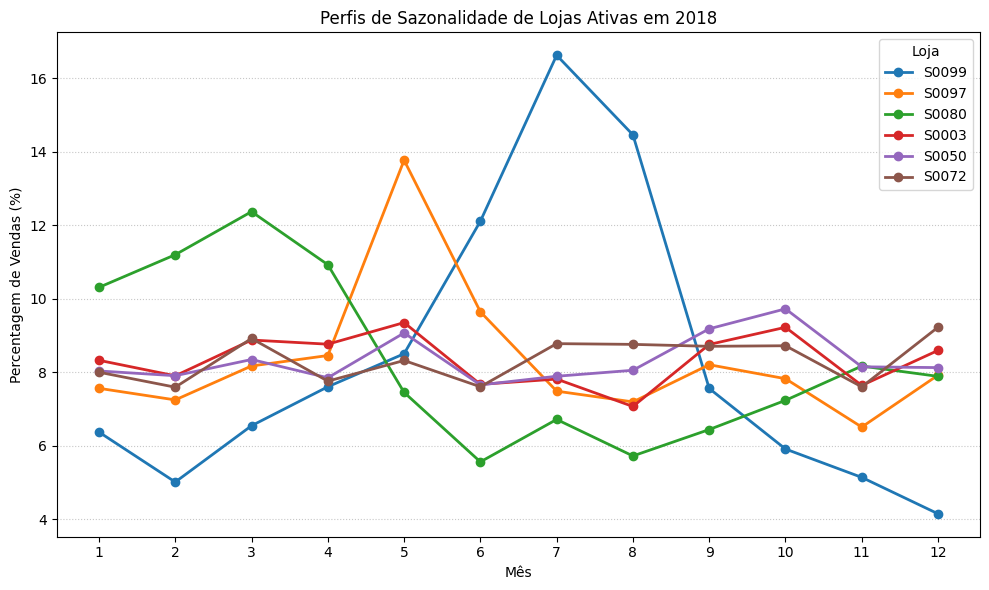

In [24]:

# --- 1. Extrair ano e mês ---
df_sales['year'] = df_sales['date'].dt.year
df_sales['month'] = df_sales['date'].dt.month

# --- 2. Filtrar o ano completo que queres analisar ---
year_to_show = 2018
df_year = df_sales[df_sales['year'] == year_to_show]

# --- 3. Agrupar vendas mensais por loja ---
monthly = (
    df_year
    .groupby(['store_id', 'month'])['sales']
    .sum()
    .reset_index()
)

# --- 4. Identificar lojas ativas nos 12 meses ---
months_per_store = monthly.groupby('store_id')['month'].nunique()
active_stores = months_per_store[months_per_store == 12].index.tolist()

# --- 5. Filtrar só lojas completamente ativas ---
monthly_active = monthly[monthly['store_id'].isin(active_stores)]

# --- 6. Calcular share mensal por loja ativa ---
monthly_active['share'] = (
    monthly_active
    .groupby('store_id')['sales']
    .transform(lambda x: x / x.sum() * 100)
)

# --- 7. Calcular amplitude sazonal (max share - min share) e escolher lojas ---
amp = (
    monthly_active
    .groupby('store_id')['share']
    .agg(lambda x: x.max() - x.min())
    .sort_values(ascending=False)
)
n = 3
top_stores = amp.head(n).index.tolist()
bottom_stores = amp.tail(n).index.tolist()
selected_stores = top_stores + bottom_stores

print("Loja(s) com maior sazonalidade (top 3):", top_stores)
print("Loja(s) com menor sazonalidade (bottom 3):", bottom_stores)

# --- 8. Plotar perfis mensais no mesmo gráfico ---
plt.figure(figsize=(10, 6))
for store in selected_stores:
    df_plot = (
        monthly_active[monthly_active['store_id'] == store]
        .set_index('month')
        .reindex(range(1, 13), fill_value=0)
    )
    plt.plot(
        df_plot.index,
        df_plot['share'],
        marker='o',
        linewidth=2,
        label=store
    )

plt.xticks(range(1,13))
plt.xlabel('Mês')
plt.ylabel('Percentagem de Vendas (%)')
plt.title(f'Perfis de Sazonalidade de Lojas Ativas em {year_to_show}')
plt.legend(title='Loja')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\jpgro\AppData\Local\Temp\ipykernel_23740\3840162381.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_active['share'] = (


Lojas selecionadas sem a S0099: ['S0097', 'S0080', 'S0003', 'S0050', 'S0072']


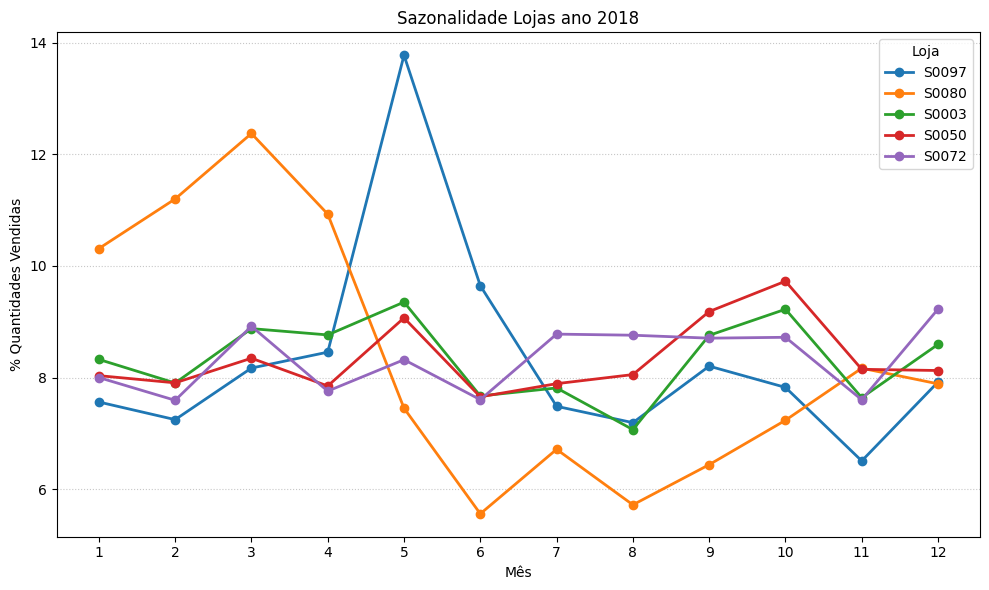

In [29]:
# --- 1. Extrair ano e mês ---
df_sales['year'] = df_sales['date'].dt.year
df_sales['month'] = df_sales['date'].dt.month

# --- 2. Filtrar o ano completo que queres analisar ---
year_to_show = 2018
df_year = df_sales[df_sales['year'] == year_to_show]

# --- 3. Agrupar vendas mensais por loja ---
monthly = (
    df_year
    .groupby(['store_id', 'month'])['sales']
    .sum()
    .reset_index()
)

# --- 4. Identificar lojas ativas nos 12 meses ---
months_per_store = monthly.groupby('store_id')['month'].nunique()
active_stores = months_per_store[months_per_store == 12].index.tolist()

# --- 5. Filtrar só lojas completamente ativas ---
monthly_active = monthly[monthly['store_id'].isin(active_stores)]

# --- 6. Calcular share mensal por loja ativa ---
monthly_active['share'] = (
    monthly_active
    .groupby('store_id')['sales']
    .transform(lambda x: x / x.sum() * 100)
)

# --- 7. Calcular amplitude sazonal e escolher lojas ---
amp = (
    monthly_active
    .groupby('store_id')['share']
    .agg(lambda x: x.max() - x.min())
    .sort_values(ascending=False)
)
n = 3
top_stores = amp.head(n).index.tolist()
bottom_stores = amp.tail(n).index.tolist()
selected_stores = top_stores + bottom_stores

# --- 7.1. Remover a loja S0099 da seleção ---
selected_stores = [store for store in selected_stores if store != 'S0099']

print("Lojas selecionadas sem a S0099:", selected_stores)

# --- 8. Plotar perfis mensais no mesmo gráfico ---
plt.figure(figsize=(10, 6))
for store in selected_stores:
    df_plot = (
        monthly_active[monthly_active['store_id'] == store]
        .set_index('month')
        .reindex(range(1, 13), fill_value=0)
    )
    plt.plot(
        df_plot.index,
        df_plot['share'],
        marker='o',
        linewidth=2,
        label=store
    )

plt.xticks(range(1,13))
plt.xlabel('Mês')
plt.ylabel('% Quantidades Vendidas')
plt.title(f'Sazonalidade Lojas ano 2018')
plt.legend(title='Loja')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig('sazonalidade_lojas.png', transparent=True, dpi=600)
plt.show()


### Promo_bin_1

In [34]:
# verificar se a promo_bin_1 está associada à promo_type_1
print(df_sales.groupby('promo_type_1')['promo_bin_1'].apply(lambda x: x.dropna().unique()))
print(pd.crosstab(df_sales['promo_type_1'], df_sales['promo_bin_1']))


promo_type_1
PR01                         [verylow, veryhigh]
PR03    [verylow, low, high, moderate, veryhigh]
PR04                                   [verylow]
PR05    [verylow, moderate, high, low, veryhigh]
PR06    [high, verylow, low, moderate, veryhigh]
PR07              [verylow, high, veryhigh, low]
PR08    [veryhigh, verylow, high, low, moderate]
PR09                        [low, high, verylow]
PR10    [low, high, verylow, moderate, veryhigh]
PR11                                   [verylow]
PR12         [verylow, veryhigh, high, moderate]
PR13                                   [verylow]
PR14                                          []
PR15                         [verylow, moderate]
PR16                                  [veryhigh]
PR17              [veryhigh, low, high, verylow]
PR18                                   [verylow]
Name: promo_bin_1, dtype: object
promo_bin_1    high     low  moderate  veryhigh  verylow
promo_type_1                                            
PR01   

In [ ]:
# Perceber se o nr de PR14 em promo_type_1 é igual ao nr de nulos em promo_bin_1

print((df_sales['promo_type_1'] == 'PR14').sum())
print(df_sales['promo_bin_1'].isnull().sum())

7653515
7653515


- Cada promo_type_1 pode ter várias promo_bin_1
- PR14 não tem nenhuma promo_bin_1 associada : provavelmente indica produto sem desconto.
- nº de PR14 em promo_type_1 é igual ao nº de nulls em promo_bin_1
<b> Isto indica-nos que os nulls de promo_bin_1 são as transações com promo_type_1 = PR , produtos sem promoção associada. Então a decisão será substituir os valores nulos por no_bin.


In [47]:
# Verificar as transações com promo_type_1 = PR14 qual é a promo_type_2
print(df_sales[df_sales['promo_type_1'] == 'PR14']['promo_type_2'].value_counts())

promo_type_2
PR03    7395007
PR02       4785
PR01       1863
PR04         88
Name: count, dtype: int64


Resumo de % Promo por promo_type_1:
   promo_type_1  avg_promo_pct  median_promo_pct    count
13         PR15      10.748878          0.000000       19
14         PR16      10.168417          7.412354      912
6          PR08       8.875208          0.000000     4176
7          PR09       6.889938          0.000000    32233
3          PR05       6.332477          0.000000   522735
8          PR10       6.034353          0.000000   206649
10         PR12       4.508810          0.000000    38979
0          PR01       4.263717          0.000000    12163
16         PR18       4.235188          0.000000     1878
4          PR06       4.011323          0.000000   116494
9          PR11       2.623060          0.000000     5007
15         PR17       2.599915          0.000000    32006
1          PR03       2.525934          0.000000   149192
5          PR07       2.331598          0.000000    55586
11         PR13       1.977832          0.000000      607
12         PR14       1.347336      

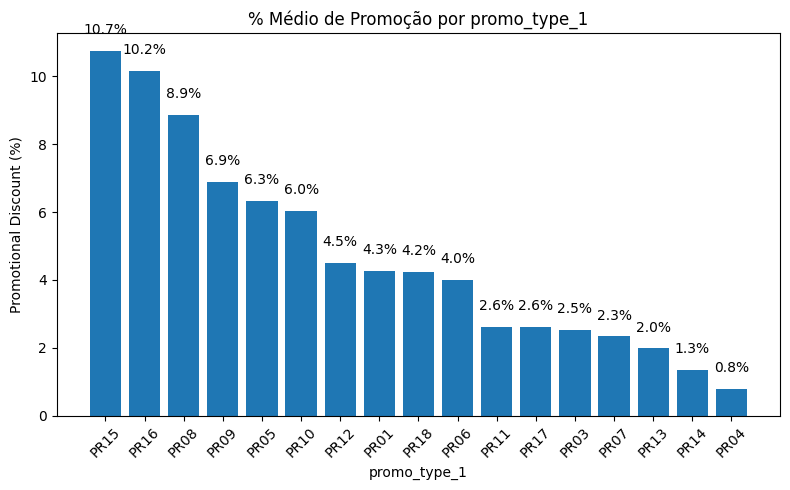

In [50]:
# perceber a % de promo em cada promo_type_1. Para isso vamos multiplicar o price pelo stock e perceber a diferença para o revenue, em percentagem

# 1) Calcula o revenue esperado sem promo (price * stock)
df_sales['expected_revenue'] = df_sales['price'] * df_sales['sales']



# 3) Agrega por promo_type_1, calculando média e contagem
promo_summary = (
    df_sales
    .groupby('promo_type_1')['promo_pct']
    .agg(
        avg_promo_pct='mean',
        median_promo_pct='median',
        count='size'
    )
    .reset_index()
    .sort_values('avg_promo_pct', ascending=False)
)

# 4) Exibe a tabela de resumo
print("Resumo de % Promo por promo_type_1:")
print(promo_summary)

# 5) Gráfico de barras da média de promoção por tipo
plt.figure(figsize=(8, 5))
bars = plt.bar(promo_summary['promo_type_1'], promo_summary['avg_promo_pct'])
plt.xlabel('promo_type_1')
plt.ylabel('Promotional Discount (%)')
plt.title('% Médio de Promoção por promo_type_1')

# Anotar valores
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, f"{h:.1f}%", ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



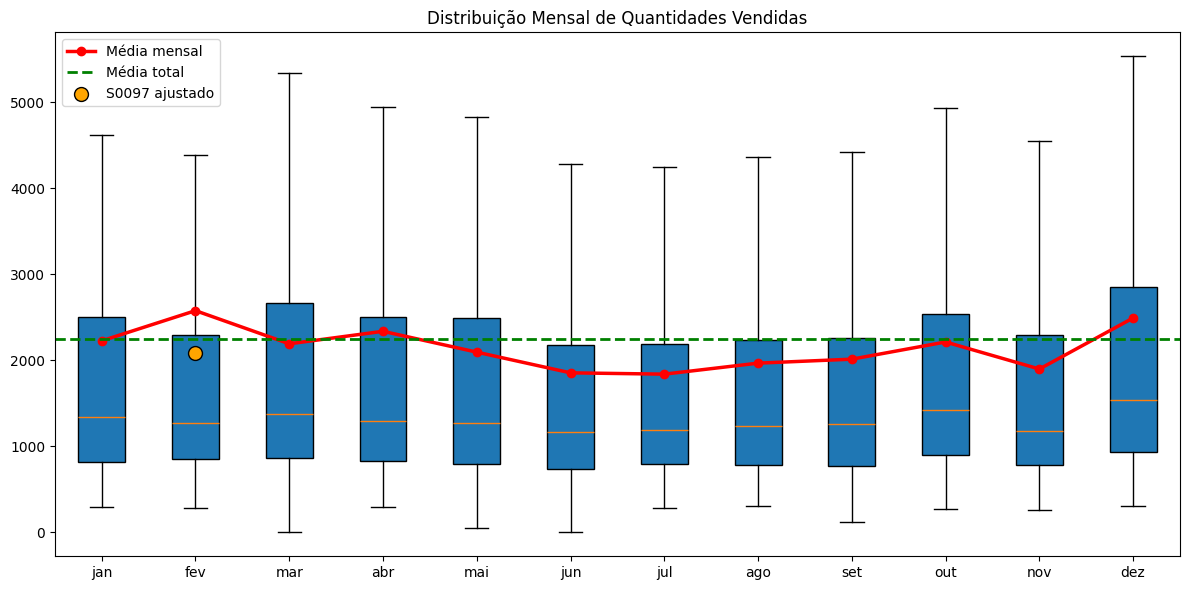

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# 1. Preparar df_sales
df_sales['date']  = pd.to_datetime(df_sales['date'], errors='coerce')
df_sales['year']  = df_sales['date'].dt.year
df_sales['month'] = df_sales['date'].dt.month

# 2. Somar vendas diárias para obter vendas mensais por loja-ano-mês
monthly_store = (
    df_sales
    .groupby(['store_id','year','month'])['sales']
    .sum()
    .reset_index(name='monthly_sales')
)

# 3. Montar box_data com filtragem:
#    - meses 1 a 9: incluir todos os anos (2017,18,19)
#    - meses 10 a 12: incluir só 2017 e 2018
box_data = []
for m in range(1, 13):
    if m <= 9:
        vals = monthly_store.loc[
            monthly_store['month'] == m,
            'monthly_sales'
        ]
    else:
        vals = monthly_store.loc[
            (monthly_store['month'] == m) &
            (monthly_store['year'].isin([2017, 2018])),
            'monthly_sales'
        ]
    box_data.append(vals.values)

# 4. Baseline = média de todas as vendas mensais de 2017+2018
baseline = (
    monthly_store[monthly_store['year'].isin([2017,2018])]
    ['monthly_sales']
    .mean()
)

# 5. Média mensal para plot (pontos), ajustada exactamente igual:
monthly_points = []
for m in range(1, 13):
    if m <= 9:
        pts = monthly_store.loc[monthly_store['month']==m, 'monthly_sales']
    else:
        pts = monthly_store.loc[
            (monthly_store['month']==m) &
            (monthly_store['year'].isin([2017,2018])),
            'monthly_sales'
        ]
    monthly_points.append(pts.mean())

# 6. Curva geral (toda a série 2017–2019) para comparação
monthly_overall = (
    monthly_store
    .groupby('month')['monthly_sales']
    .mean()
    .reindex(range(1,13))
    .reset_index(name='overall_avg_sales')
)

# 7. Plot final
fig, ax = plt.subplots(figsize=(12, 6))

# Boxplots
ax.boxplot(box_data, positions=range(1,13), showfliers=False, patch_artist=True)
for box in ax.artists:
    box.set_alpha(0.6)


# Média mensal ajustada (pontos)
ax.plot(
    range(1,13),
    monthly_points,
    color='red', marker='o', linewidth=2.5, label='Média mensal'
)

# Baseline 2017-18
ax.axhline(
    baseline,
    color='green', linestyle='--', linewidth=2,
    label=f'Média total'
)

import numpy as np

# ————————————————
# cálculo do ponto ajustado de Fevereiro
# ————————————————
feb = monthly_store[monthly_store['month'] == 2]

# 1. média de S0097 em 2018 e 2019
mean_s0097_18_19 = feb.loc[
    (feb['store_id'] == 'S0097') &
    (feb['year'].isin([2018, 2019])),
    'monthly_sales'
].mean()

# 2. coleta todos os valores de Fevereiro, exceto o outlier de 2017 em S0097
feb_vals = feb.loc[~(
    (feb['store_id'] == 'S0097') &
    (feb['year'] == 2017)
), 'monthly_sales'].tolist()

# 3. acrescenta o valor substituído
feb_vals.append(mean_s0097_18_19)

# 4. média ajustada
feb_adjusted_point = np.mean(feb_vals)

# ————————————————
# na hora de plotar, depois do boxplot e das outras linhas:
# ————————————————
ax.scatter(
    2, feb_adjusted_point,
    color='orange',
    s=100,
    edgecolor='black',
    zorder=5,
    label='S0097 ajustado'
)
ax.legend()



# Formatação
ax.set_xticks(range(1,13))
ax.set_xticklabels([calendar.month_abbr[m] for m in range(1,13)])
ax.set_title('Distribuição Mensal de Quantidades Vendidas')
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('monthly_sales_boxplot.png', transparent=True, dpi=300)
plt.show()


Fevereiro — Q1=850, Q3=2301, IQR=1451
Limites de outlier: <-1327 ou >4477
Outliers de Fevereiro:
     store_id  year  month  monthly_sales
1464    S0097  2017      2      88208.367
1211    S0085  2017      2      13942.176
1223    S0085  2018      2      12072.340
1235    S0085  2019      2      11515.731
493     S0038  2017      2       7757.954
382     S0026  2018      2       6491.370
370     S0026  2017      2       6430.139
517     S0038  2019      2       6230.497
280     S0020  2018      2       6185.148
926     S0062  2019      2       6101.248
902     S0062  2017      2       6094.823
914     S0062  2018      2       6041.574
268     S0020  2017      2       5975.584
394     S0026  2019      2       5883.248
292     S0020  2019      2       5581.816
505     S0038  2018      2       5407.630
1476    S0097  2018      2       5065.757
1488    S0097  2019      2       5055.352
1430    S0095  2017      2       4725.268


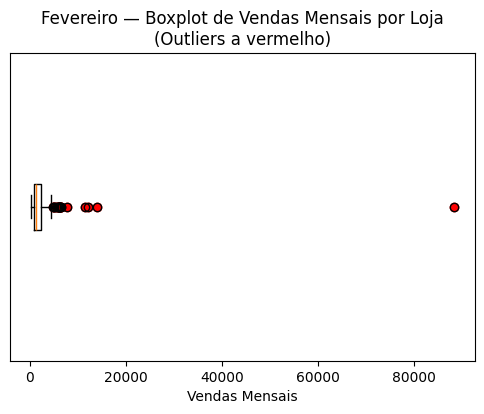

In [ ]:
# Investigr fevereiro 
import matplotlib.pyplot as plt

# já tens monthly_store com ['store_id','year','month','monthly_sales']
feb = monthly_store[monthly_store['month'] == 2].copy()

# Calcular outliers
Q1  = feb['monthly_sales'].quantile(0.25)
Q3  = feb['monthly_sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Fevereiro — Q1={Q1:.0f}, Q3={Q3:.0f}, IQR={IQR:.0f}")
print(f"Limites de outlier: <{lower_bound:.0f} ou >{upper_bound:.0f}")

outliers = feb[feb['monthly_sales'] > upper_bound]\
             .sort_values('monthly_sales', ascending=False)
print("Outliers de Fevereiro:")
print(outliers)



plt.figure(figsize=(6,4))
plt.boxplot(feb['monthly_sales'], vert=False, showfliers=True)
plt.scatter(outliers['monthly_sales'], [1]*len(outliers), color='red')
plt.title("Fevereiro — Boxplot de Vendas Mensais por Loja\n(Outliers a vermelho)")
plt.xlabel("Vendas Mensais")
plt.yticks([])
plt.show()


          date  daily_sales
0   2017-02-01      167.330
1   2017-02-02    13954.663
2   2017-02-03      161.977
3   2017-02-04      247.870
4   2017-02-05      326.169
5   2017-02-06      129.915
6   2017-02-07      148.730
7   2017-02-08    13989.334
8   2017-02-09      151.446
9   2017-02-10      153.249
10  2017-02-11      254.561
11  2017-02-12      314.291
12  2017-02-13      138.134
13  2017-02-14      174.456
14  2017-02-15      149.076
15  2017-02-16      136.183
16  2017-02-17      202.685
17  2017-02-18      264.173
18  2017-02-19      306.201
19  2017-02-20      184.026
20  2017-02-21      148.830
21  2017-02-22      124.670
22  2017-02-23      152.310
23  2017-02-24    27798.746
24  2017-02-25      284.620
25  2017-02-26      277.102
26  2017-02-27    27756.427
27  2017-02-28      111.193


Text(0.5, 1.0, 'Vendas Diárias da Loja S0097 em Fevereiro de 2017')

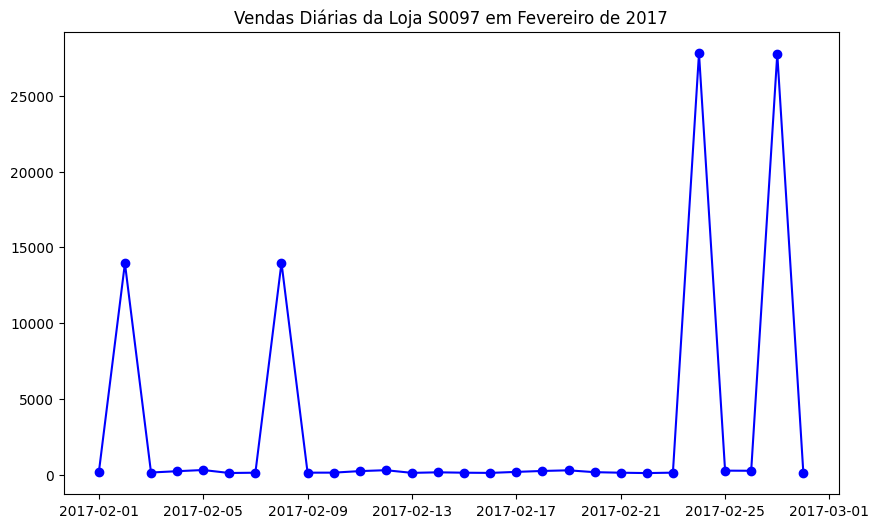

In [78]:
# quantidades vendidas da loja S0097 em fevereiro de 2017, por dia

# 1. Certifica-te que date é datetime
df_sales['date'] = pd.to_datetime(df_sales['date'], errors='coerce')

# 2. Filtrar apenas S0097 e mês/ano desejados
mask = (
    (df_sales['store_id'] == 'S0097') &
    (df_sales['date'].dt.year  == 2017) &
    (df_sales['date'].dt.month == 2)
)
feb_2017_s0097 = df_sales.loc[mask].copy()

# 3. Agrupar por dia e somar vendas
daily_sales = (
    feb_2017_s0097
    .groupby(feb_2017_s0097['date'].dt.date)['sales']
    .sum()
    .reset_index(name='daily_sales')
)

print(daily_sales)

plt.figure(figsize=(10, 6))
plt.plot(daily_sales['date'], daily_sales['daily_sales'], marker='o', color='blue')
plt.title('Vendas Diárias da Loja S0097 em Fevereiro de 2017')

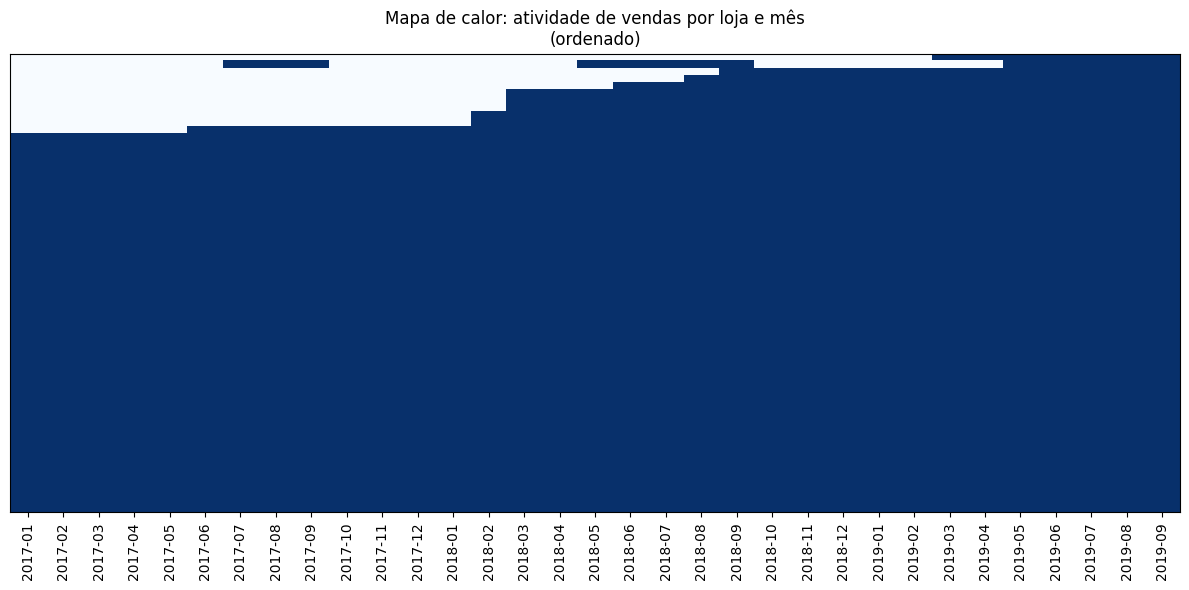

In [107]:
# Análise de sazonalidade
import pandas as pd
import matplotlib.pyplot as plt


# 1. Garante que 'date' é datetime e cria 'year_month'
df_sales['date'] = pd.to_datetime(df_sales['date'], errors='coerce')
df_sales['year_month'] = df_sales['date'].dt.to_period('M').astype(str)

# 2. Gera activity_pivot (1 se ativo, 0 se não)
activity = (
    df_sales[['store_id','year_month']]
    .drop_duplicates()
    .assign(active=1)
    .pivot(index='store_id', columns='year_month', values='active')
    .fillna(0)
)

# 3. Adiciona coluna de total de meses ativos e ordena
activity['total_active_months'] = activity.sum(axis=1)
activity_sorted = activity.sort_values('total_active_months')

# 4. Remove a coluna auxiliar antes de plotar
activity_sorted = activity_sorted.drop(columns='total_active_months')

# 5. Plot
plt.figure(figsize=(12,6))
plt.imshow(activity_sorted, aspect='auto', cmap='Blues', interpolation='none')
plt.yticks([])
plt.xticks(range(len(activity_sorted.columns)), activity_sorted.columns, rotation=90)
plt.title('Mapa de calor: atividade de vendas por loja e mês\n(ordenado)')
plt.tight_layout()
plt.savefig('activity_heatmap.png', transparent=True, dpi=300)
plt.show()




In [33]:
import pandas as pd

# (Re)cria a coluna year_month se ainda não existir
df_sales['date'] = pd.to_datetime(df_sales['date'], errors='coerce')
df_sales['year_month'] = df_sales['date'].dt.to_period('M')

# Lista das lojas sazonais que já tens
seasonal_ids = ['S0005','S0007','S0036','S0046','S0059',
                'S0061','S0071','S0076','S0092','S0109','S0136']

# Filtra só vendas para essas lojas e extrai meses únicos
seasonal_months = (
    df_sales[df_sales['store_id'].isin(seasonal_ids)]
    .drop_duplicates(['store_id','year_month'])
    .sort_values(['store_id','year_month'])
    .loc[:, ['store_id','year_month']]
)

# Função para agrupar intervalos contíguos num grupo
def extract_periods(months):
    periods = []
    start = prev = months.iloc[0]
    for m in months.iloc[1:]:
        # se não for o mês imediatamente a seguir, fecha o período e começa novo
        if m != prev + 1:
            periods.append((start.to_timestamp('M'), prev.to_timestamp('M') + pd.offsets.MonthEnd(0)))
            start = m
        prev = m
    # adiciona o último
    periods.append((start.to_timestamp('M'), prev.to_timestamp('M') + pd.offsets.MonthEnd(0)))
    return periods

# Para cada loja, extrai os períodos de atividade
activity_periods = {}
for store, grp in seasonal_months.groupby('store_id'):
    months = grp['year_month'].reset_index(drop=True)
    activity_periods[store] = extract_periods(months)

# Exibe
for store, periods in activity_periods.items():
    print(f"\nLoja {store} esteve aberta nos seguintes períodos:")
    for start, end in periods:
        print(f"  • {start.strftime('%Y-%m')} até {end.strftime('%Y-%m')}")



Loja S0005 esteve aberta nos seguintes períodos:
  • 2018-02 até 2019-10

Loja S0007 esteve aberta nos seguintes períodos:
  • 2019-03 até 2019-10

Loja S0036 esteve aberta nos seguintes períodos:
  • 2018-02 até 2019-10

Loja S0046 esteve aberta nos seguintes períodos:
  • 2018-03 até 2019-10

Loja S0059 esteve aberta nos seguintes períodos:
  • 2017-06 até 2019-10

Loja S0061 esteve aberta nos seguintes períodos:
  • 2018-03 até 2019-10

Loja S0071 esteve aberta nos seguintes períodos:
  • 2018-06 até 2019-10

Loja S0076 esteve aberta nos seguintes períodos:
  • 2018-03 até 2019-10

Loja S0092 esteve aberta nos seguintes períodos:
  • 2018-08 até 2019-10

Loja S0109 esteve aberta nos seguintes períodos:
  • 2018-09 até 2019-10

Loja S0136 esteve aberta nos seguintes períodos:
  • 2017-07 até 2017-09
  • 2018-05 até 2018-09
  • 2019-05 até 2019-09


In [43]:
# Importar products e cities
df_products = pd.read_csv("C:/Users/jpgro/OneDrive/PG_Analitics_Data_Science/Projeto 2/data/product.csv")
df_cities = pd.read_csv("C:/Users/jpgro/OneDrive/PG_Analitics_Data_Science/Projeto 2/data/cities.csv")

In [123]:
# 1. Merge para ter cluster_id em todas as vendas
df_merged = df_sales.merge(
    df_products[['product_id','cluster_id']],
    on='product_id',
    how='left'
)

# 2. Soma as sales por cluster_id
sales_by_cluster = (
    df_merged
    .groupby('cluster_id', dropna=False)['sales']
    .sum()
    .reset_index()
)

# 3. Calcula a percentagem sobre o total
total_sales = sales_by_cluster['sales'].sum()
sales_by_cluster['pct_sales'] = sales_by_cluster['sales'] / total_sales * 100

# 4. Opcional: ordena por percentagem desc
sales_by_cluster = sales_by_cluster.sort_values('pct_sales', ascending=False)

# 5. Formata para mostrar com duas casas decimais
sales_by_cluster['pct_sales'] = sales_by_cluster['pct_sales'].round(2)

print(sales_by_cluster)


  cluster_id        sales  pct_sales
0  cluster_0  2029154.244      49.93
3  cluster_3   398896.000       9.82
9  cluster_9   350970.535       8.64
7  cluster_7   340965.204       8.39
4  cluster_4   242074.000       5.96
6  cluster_6   212807.000       5.24
8  cluster_8   142534.000       3.51
2  cluster_2   136365.000       3.36
5  cluster_5   111883.000       2.75
1  cluster_1    97973.000       2.41


In [121]:
print(df_merged.head())
print("Cluster_id nulos:", df_merged['cluster_id'].isna().sum())

   Unnamed: 0 store_id product_id       date  sales  revenue  stock  price  \
0           1    S0002      P0001 2017-01-02    0.0     0.00    8.0   6.25   
1           2    S0002      P0005 2017-01-02    0.0     0.00   11.0  33.90   
2           3    S0002      P0011 2017-01-02    0.0     0.00    9.0  49.90   
3           4    S0002      P0015 2017-01-02    1.0     2.41   19.0   2.60   
4           5    S0002      P0017 2017-01-02    0.0     0.00   12.0   1.49   

  promo_type_1 promo_bin_1 promo_type_2 promo_bin_2  promo_discount_2  \
0         PR14         NaN         PR03         NaN               NaN   
1         PR14         NaN         PR03         NaN               NaN   
2         PR14         NaN         PR03         NaN               NaN   
3         PR14         NaN         PR03         NaN               NaN   
4         PR14         NaN         PR03         NaN               NaN   

  promo_discount_type_2  year  month year_month cluster_id  
0                   NaN  2017  

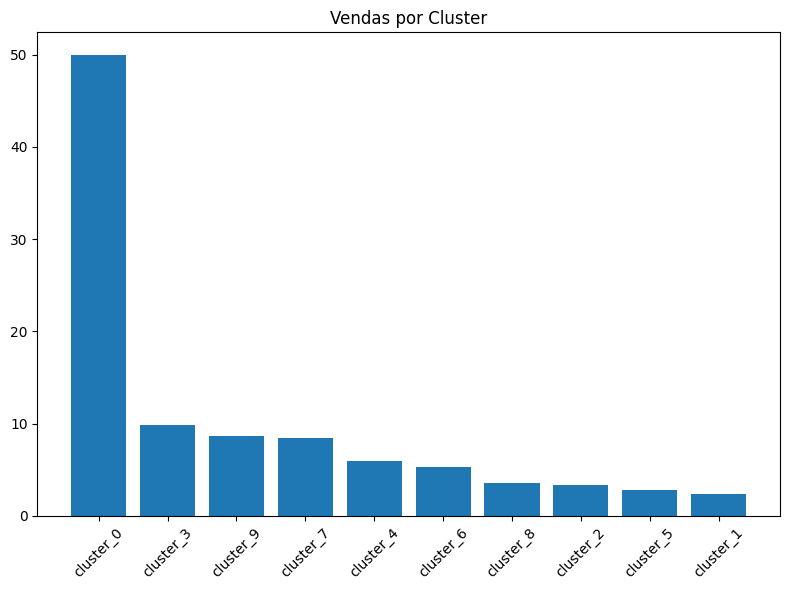

In [127]:
plt.figure(figsize=(8,6))
plt.bar(
    sales_by_cluster['cluster_id'].astype(str),
    sales_by_cluster['pct_sales'],
)
plt.title('Vendas por Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cluster_id_distribuition.png', transparent=True, dpi=300)
plt.show()


In [128]:
import pandas as pd

# 1. Merge trazendo também hierarchy1_id e hierarchy2_id
df_merged = df_sales.merge(
    df_products[['product_id','cluster_id','hierarchy1_id','hierarchy2_id']],
    on='product_id',
    how='left'
)

# 2. Filtrar apenas as vendas > 0
df_pos = df_merged[df_merged['sales'] > 0]

# 3. Soma total de vendas positivas (denominador)
total_pos_sales = df_pos['sales'].sum()

# 4. Agregação e % por hierarchy1_id
sales_h1_pct = (
    df_pos
      .groupby('hierarchy1_id', dropna=False)['sales']
      .sum()
      .reset_index()
)
sales_h1_pct['pct_sales'] = (sales_h1_pct['sales'] / total_pos_sales * 100).round(2)
sales_h1_pct = sales_h1_pct.sort_values('pct_sales', ascending=False)

# 5. Agregação e % por hierarchy2_id
sales_h2_pct = (
    df_pos
      .groupby('hierarchy2_id', dropna=False)['sales']
      .sum()
      .reset_index()
)
sales_h2_pct['pct_sales'] = (sales_h2_pct['sales'] / total_pos_sales * 100).round(2)
sales_h2_pct = sales_h2_pct.sort_values('pct_sales', ascending=False)

# 6. Mostrar resultados
print("%% de vendas (sales>0) por hierarchy1_id:")
print(sales_h1_pct)

print("\n%% de vendas (sales>0) por hierarchy2_id:")
print(sales_h2_pct)


%% de vendas (sales>0) por hierarchy1_id:
  hierarchy1_id        sales  pct_sales
0           H00  3093790.244      76.13
1           H01   468470.000      11.53
3           H03   445661.000      10.97
2           H02    55700.739       1.37

%% de vendas (sales>0) por hierarchy2_id:
   hierarchy2_id        sales  pct_sales
3          H0003  1440674.000      35.45
0          H0000   765562.000      18.84
4          H0004   358238.244       8.82
2          H0002   306663.000       7.55
13         H0313   288558.000       7.10
1          H0001   222653.000       5.48
8          H0108   172669.000       4.25
7          H0107   120539.000       2.97
6          H0106    88738.000       2.18
5          H0105    86524.000       2.13
14         H0314    63134.000       1.55
12         H0312    62109.000       1.53
10         H0210    47527.853       1.17
15         H0315    16759.000       0.41
11         H0311    12332.000       0.30
9          H0209     8172.886       0.20
17         H0317  

In [44]:
import pandas as pd

# 1) (Opcional) Filtrar só vendas cujo product_id e store_id existem nas tuas tabelas de dimensão
sales_validadas = (
    df_sales
      .merge(df_products[['product_id']], on='product_id', how='inner')
      .merge(df_cities[['store_id']],    on='store_id',   how='inner')
)

# 2) Agrupar por store_id e contar quantos product_id distintos existem
prod_por_loja = (
    sales_validadas
      .groupby('store_id')['product_id']
      .nunique()
      .reset_index(name='n_products')
)

print(prod_por_loja)


   store_id  n_products
0     S0002         409
1     S0003         143
2     S0005         200
3     S0007         123
4     S0010         242
..      ...         ...
58    S0132         383
59    S0136         105
60    S0141         115
61    S0142         352
62    S0143         129

[63 rows x 2 columns]


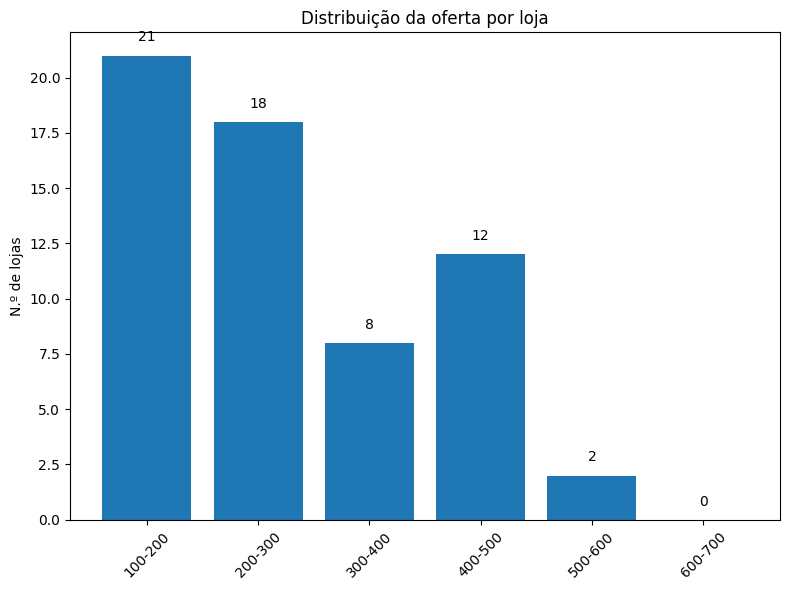

In [45]:
# 1) Definir as faixas (bins) e os seus rótulos
bins = list(range(100, 701, 100))    # [100,200,300,400,500,600,700]
labels = [f"{i}-{i+100}" for i in bins[:-1]]  # ['100-200','200-300',...]

# 2) Criar uma coluna com a faixa de cada loja
prod_por_loja['prod_bin'] = pd.cut(
    prod_por_loja['n_products'],
    bins=bins,
    labels=labels,
    right=False,       # inclui o limite inferior, exclui o superior
    include_lowest=True
)

# 3) Contar quantas lojas caem em cada faixa
counts = prod_por_loja['prod_bin'].value_counts().sort_index()

# 4) Plotar o gráfico de barras com anotações acima das barras
plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index.astype(str), counts.values)
plt.title('Distribuição da oferta por loja')
plt.ylabel('N.º de lojas')
plt.xticks(rotation=45)

# Anotar cada barra com o seu valor
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # posição x no centro da barra
        height + 0.5,                        # posição y ligeiramente acima do topo
        f"{int(height)}",                   # texto com o valor
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.savefig('product_distribution_by_store.png', transparent=True, dpi=600)
plt.show()


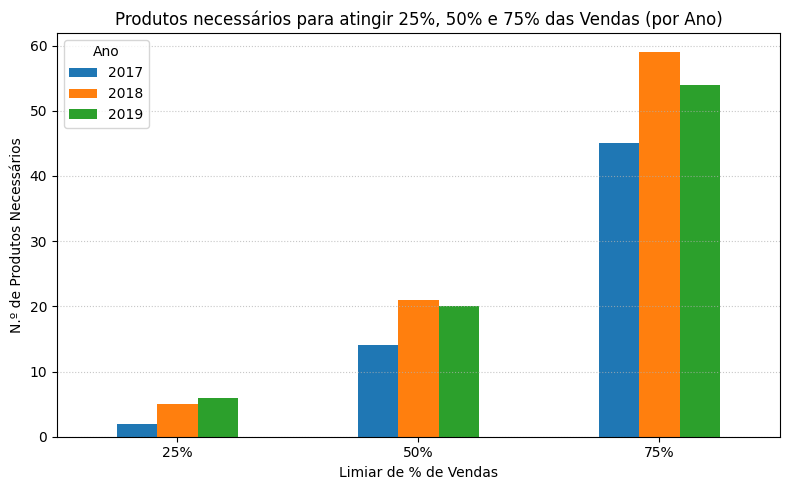

In [146]:
years     = [2017, 2018, 2019]
thresholds = [0.25, 0.50, 0.75]

# Calcula, para cada ano e cada threshold, quantos SKUs são precisos
results = []
for yr in years:
    sales_year = df_sales[df_sales['year'] == yr]
    sbp = sales_year.groupby('product_id')['sales'].sum().sort_values(ascending=False)
    cum_pct = sbp.cumsum() / sbp.sum()
    n = len(sbp)
    for t in thresholds:
        idx = np.searchsorted(cum_pct.values, t)
        results.append({
            'year': yr,
            'threshold': f"{int(t*100)}%",
            'n_skus': idx + 1
        })

df_thresh = pd.DataFrame(results)

# --- 2. Desenhar o gráfico de barras agrupadas ---
fig, ax = plt.subplots(figsize=(8,5))

# pivot para formato wide
pivot = df_thresh.pivot(index='threshold', columns='year', values='n_skus')

# plota
pivot.plot(kind='bar', ax=ax)
ax.set_xlabel('Limiar de % de Vendas')
ax.set_ylabel('N.º de Produtos Necessários')
ax.set_title('Produtos necessários para atingir 25%, 50% e 75% das Vendas (por Ano)')
ax.legend(title='Ano')
ax.grid(axis='y', linestyle=':', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Tabela de SKUs necessários para atingir cada threshold por ano:
   year threshold  n_skus  cum_pct_reached
0  2017       25%       2         0.268221
1  2017       50%      14         0.506066
2  2017       75%      45         0.752758
3  2018       25%       5         0.258337
4  2018       50%      21         0.506965
5  2018       75%      59         0.753160
6  2019       25%       6         0.256388
7  2019       50%      20         0.505488
8  2019       75%      54         0.752480


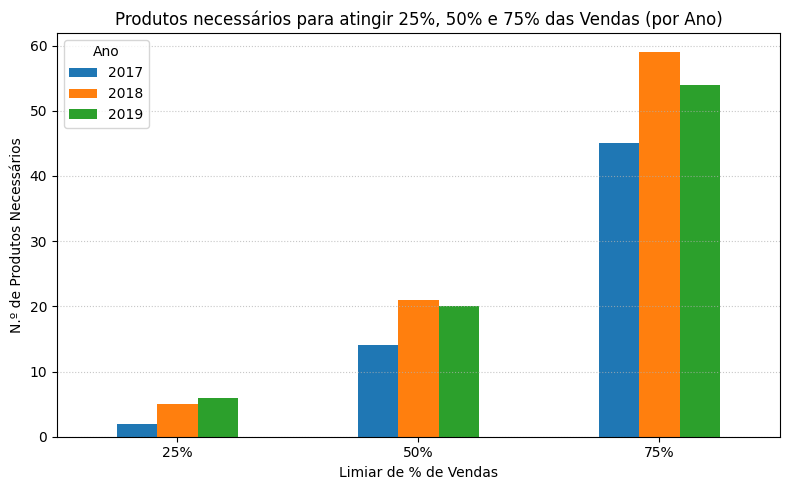

In [148]:
years = [2017, 2018, 2019]
thresholds = [0.25, 0.50, 0.75]

# Calcula, para cada ano e cada threshold, quantos SKUs são precisos
results = []
for yr in years:
    sales_year = df_sales[df_sales['year'] == yr]
    sbp = sales_year.groupby('product_id')['sales'].sum().sort_values(ascending=False)
    cum_pct = sbp.cumsum() / sbp.sum()
    n = len(sbp)
    for t in thresholds:
        idx = np.searchsorted(cum_pct.values, t)
        results.append({
            'year': yr,
            'threshold': f"{int(t*100)}%",
            'n_skus': idx + 1,
            'cum_pct_reached': cum_pct.values[idx]
        })

df_thresh = pd.DataFrame(results)

# Mostrar a tabela resultante
print("Tabela de SKUs necessários para atingir cada threshold por ano:")
print(df_thresh)

# --- Gráfico de barras agrupadas ---
fig, ax = plt.subplots(figsize=(8,5))
pivot = df_thresh.pivot(index='threshold', columns='year', values='n_skus')
pivot.plot(kind='bar', ax=ax)
ax.set_xlabel('Limiar de % de Vendas')
ax.set_ylabel('N.º de Produtos Necessários')
ax.set_title('Produtos necessários para atingir 25%, 50% e 75% das Vendas (por Ano)')
ax.legend(title='Ano')
ax.grid(axis='y', linestyle=':', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


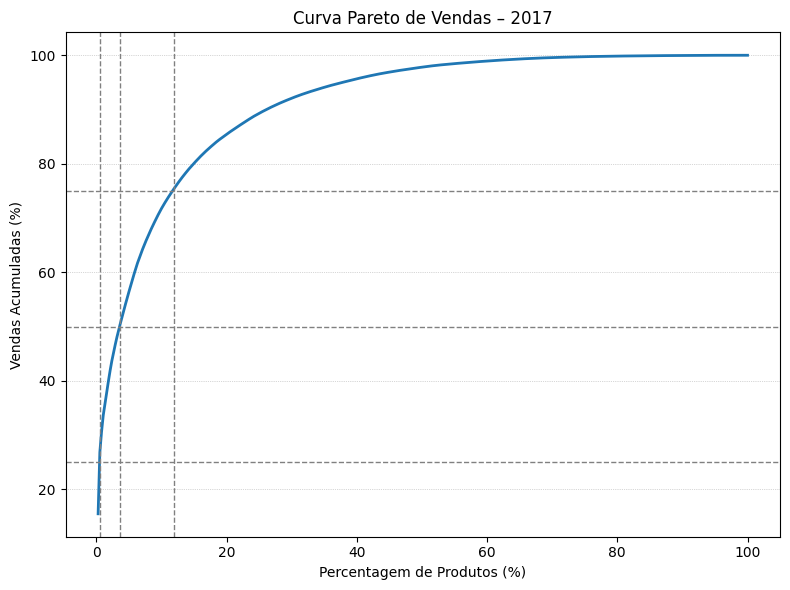

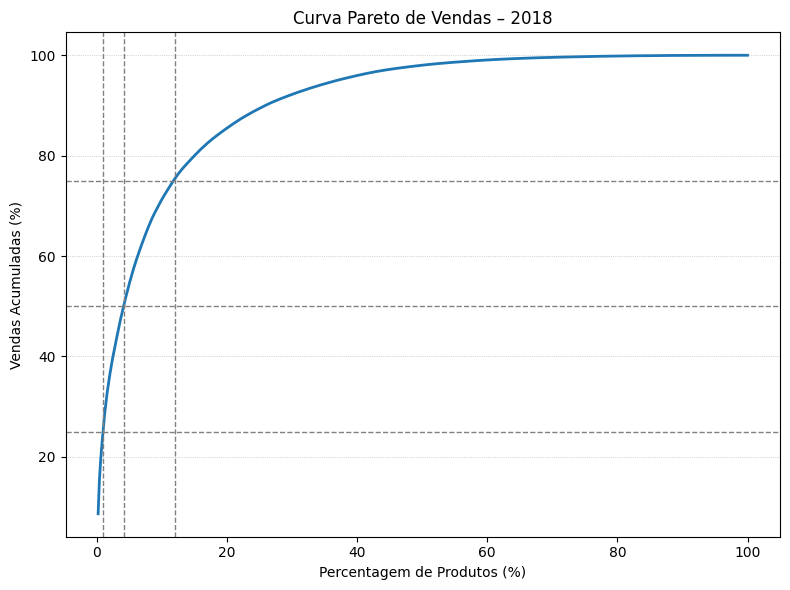

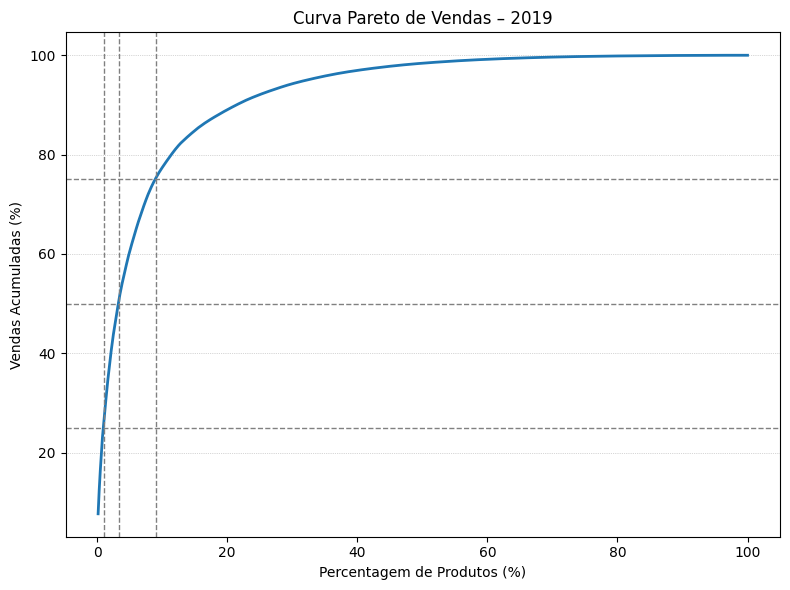

In [149]:

# Define anos e limiares
years = [2017, 2018, 2019]
thresholds = [0.25, 0.50, 0.75]

for yr in years:
    # 1) Filtra apenas o ano corrente
    sales_year = df_sales[df_sales['year'] == yr]

    # 2) Agrega e ordena vendas por produto
    sales_by_product = (
        sales_year
        .groupby('product_id')['sales']
        .sum()
        .sort_values(ascending=False)
    )

    # 3) Calcula acumulados e percentagens
    total = sales_by_product.sum()
    cum_sales = sales_by_product.cumsum()
    cum_pct   = cum_sales / total

    # 4) Determina quantos SKUs para cada limiar
    n_products = len(sales_by_product)
    threshold_results = {}
    for t in thresholds:
        idx = np.searchsorted(cum_pct.values, t)
        n_skus   = idx + 1
        pct_skus = n_skus / n_products
        threshold_results[t] = (n_skus, pct_skus)

    # 5) Plota num gráfico separado
    plt.figure(figsize=(8, 6))
    x = np.arange(1, n_products + 1) / n_products * 100
    y = cum_pct.values * 100
    plt.plot(x, y, linewidth=2)
    
    # Anota os limiares
    for t, (n_skus, pct_skus) in threshold_results.items():
        plt.axhline(t * 100, color='gray', linestyle='--', linewidth=1)
        plt.axvline(pct_skus * 100, color='gray', linestyle='--', linewidth=1)

    plt.title(f'Curva Pareto de Vendas – {yr}')
    plt.xlabel('Percentagem de Produtos (%)')
    plt.ylabel('Vendas Acumuladas (%)')
    plt.grid(axis='y', linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(f'pareto_curve_{yr}.png', transparent=True, dpi=300)
    plt.show()



--- store_id ---
store_id
S0038    334082
S0085    325409
S0097    279019
S0094    276217
S0104    271338
          ...  
S0092     50479
S0041     38579
S0076     30073
S0136     17231
S0007     14910
Name: count, Length: 63, dtype: int64


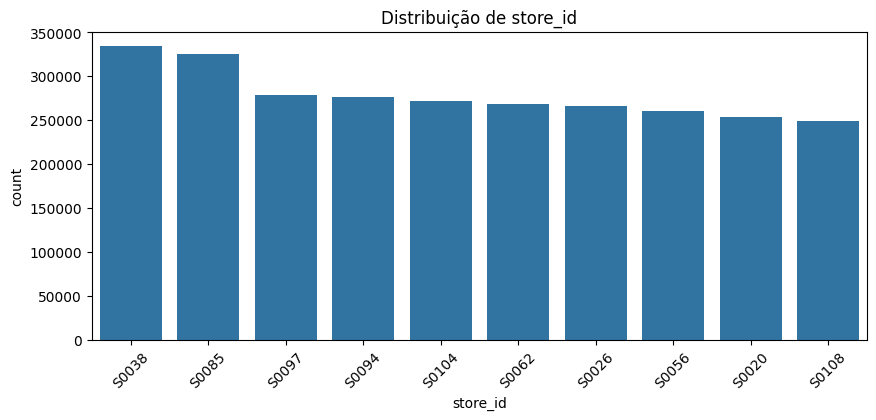


--- product_id ---
product_id
P0664    59051
P0125    58708
P0261    58504
P0364    58428
P0131    58117
         ...  
P0254       31
P0396       28
P0630       20
P0281       14
P0142        1
Name: count, Length: 615, dtype: int64


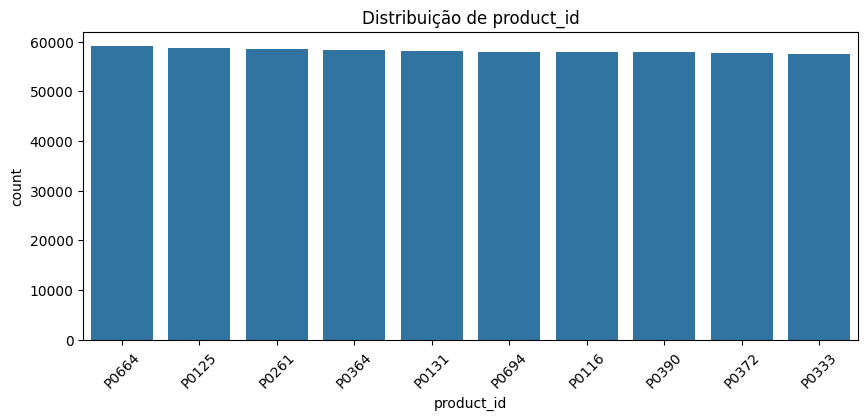


--- promo_type_1 ---
promo_type_1
PR14    7653515
PR05     547253
PR10     213664
PR03     151863
PR06     124289
PR07      57419
PR12      40840
PR09      35752
PR17      32863
PR01      12618
PR11       5007
PR08       4176
PR04       3383
PR18       1878
PR16        912
PR13        607
PR15         19
Name: count, dtype: int64


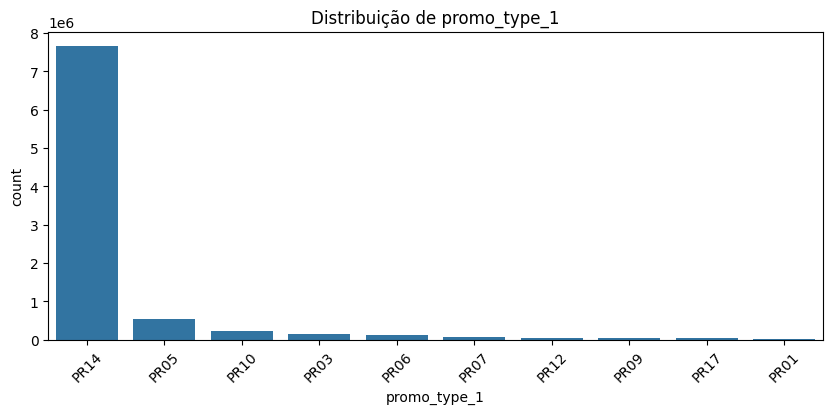


--- promo_bin_1 ---
promo_bin_1
NaN         7653515
verylow      514398
low          259135
moderate     193475
high         146120
veryhigh     119415
Name: count, dtype: int64


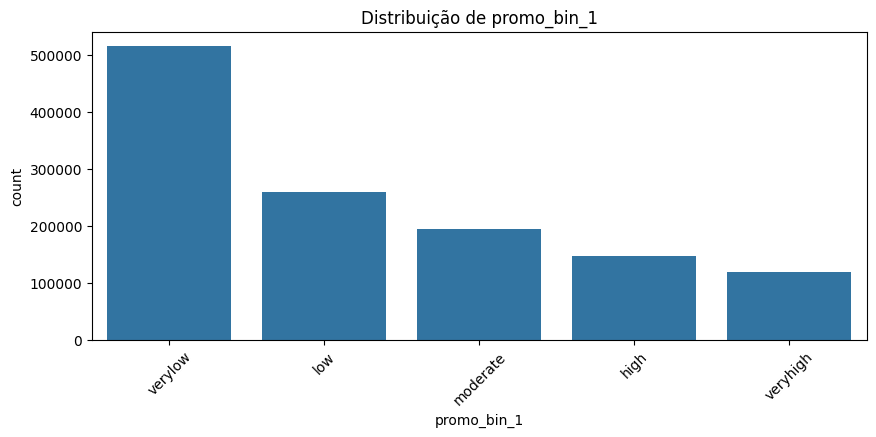


--- promo_type_2 ---
promo_type_2
PR03    8873337
PR02       7026
PR04       2892
PR01       2803
Name: count, dtype: int64


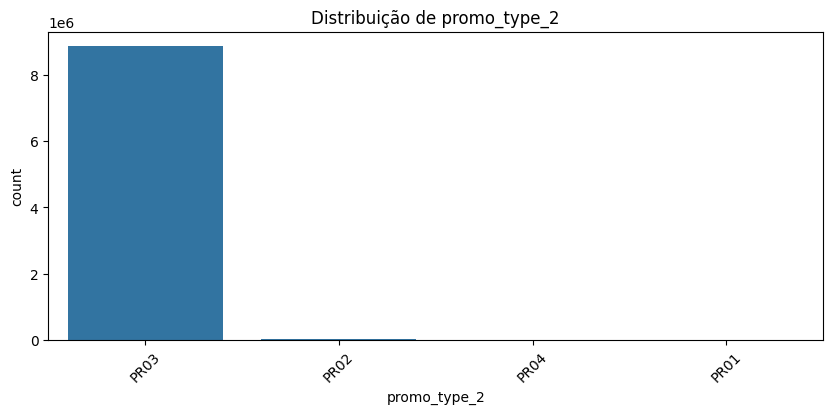


--- promo_bin_2 ---
promo_bin_2
NaN         8873337
verylow        6441
high           3637
veryhigh       2643
Name: count, dtype: int64


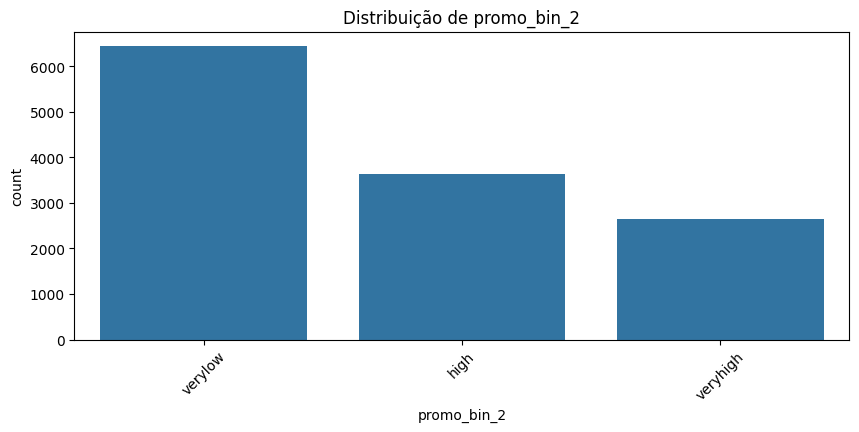


--- promo_discount_type_2 ---
promo_discount_type_2
NaN     8873337
PR01       3762
PR02       3648
PR04       2793
PR03       2518
Name: count, dtype: int64


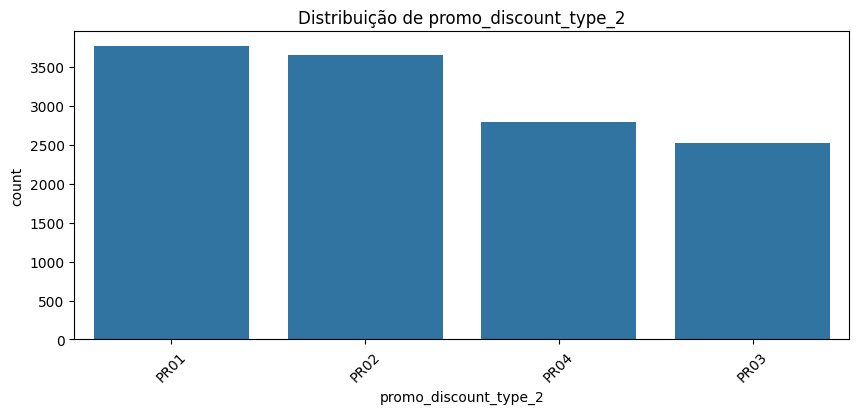

In [9]:
# Variáveis categóricas

categorical_cols = ['store_id', 'product_id', 'promo_type_1', 'promo_bin_1', 'promo_type_2', 'promo_bin_2', 'promo_discount_type_2']
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df_sales[col].value_counts(dropna=False))  # Contagem incluindo NaNs
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_sales, x=col, order=df_sales[col].value_counts().iloc[:10].index)  # Top 10
    plt.title(f"Distribuição de {col}")
    plt.xticks(rotation=45)
    plt.show()


--- sales ---
count    8.583762e+06
mean     4.734080e-01
std      2.129059e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.330100e+04
Name: sales, dtype: float64


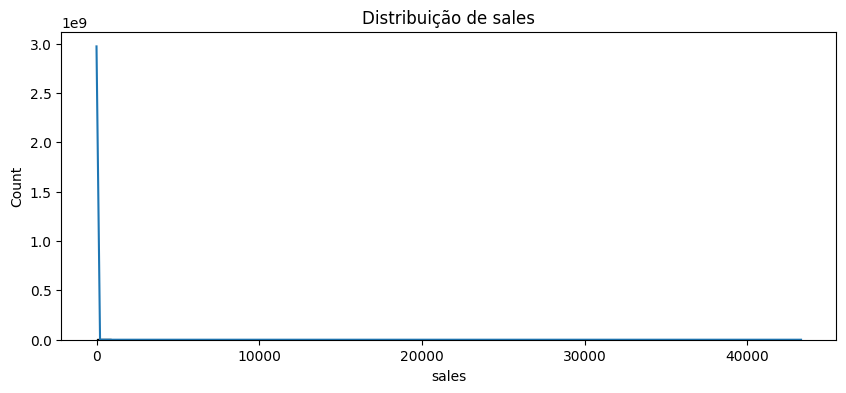


--- revenue ---
count    8.583762e+06
mean     2.285173e+00
std      5.406806e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.419796e+04
Name: revenue, dtype: float64


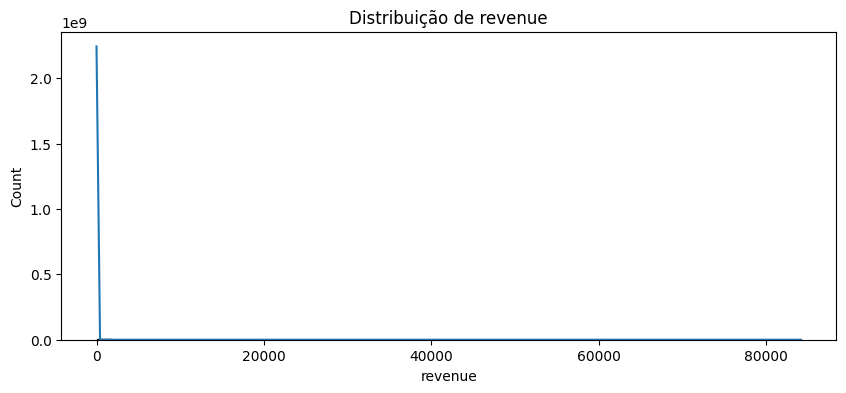


--- stock ---
count    8.583762e+06
mean     1.600575e+01
std      3.751692e+01
min      0.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      1.700000e+01
max      4.655000e+03
Name: stock, dtype: float64


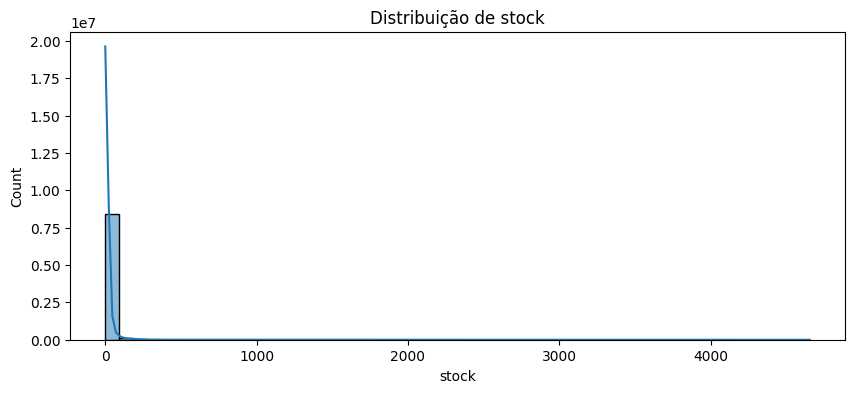


--- price ---
count    8.794677e+06
mean     1.575377e+01
std      3.277869e+01
min      1.000000e-02
25%      3.450000e+00
50%      8.000000e+00
75%      1.695000e+01
max      1.599000e+03
Name: price, dtype: float64


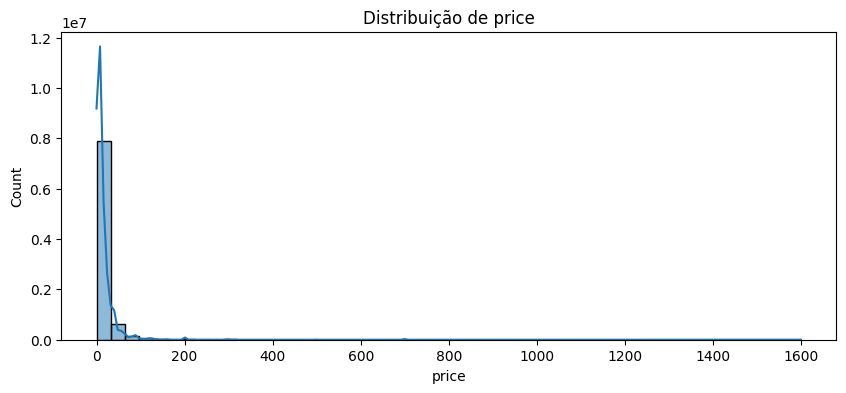


--- promo_discount_2 ---
count    12721.000000
mean        30.110605
std         11.850900
min         16.000000
25%         20.000000
50%         20.000000
75%         35.000000
max         50.000000
Name: promo_discount_2, dtype: float64


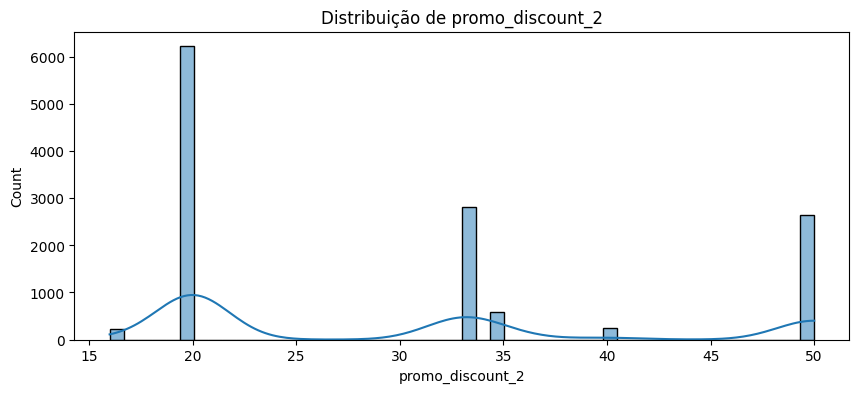

In [10]:
# 3. Variáveis numéricas

numeric_cols = ['sales', 'revenue', 'stock', 'price', 'promo_discount_2']
for col in numeric_cols:
    print(f"\n--- {col} ---")
    print(df_sales[col].describe())
    plt.figure(figsize=(10, 4))
    sns.histplot(df_sales[col], bins=50, kde=True)
    plt.title(f"Distribuição de {col}")
    plt.show()

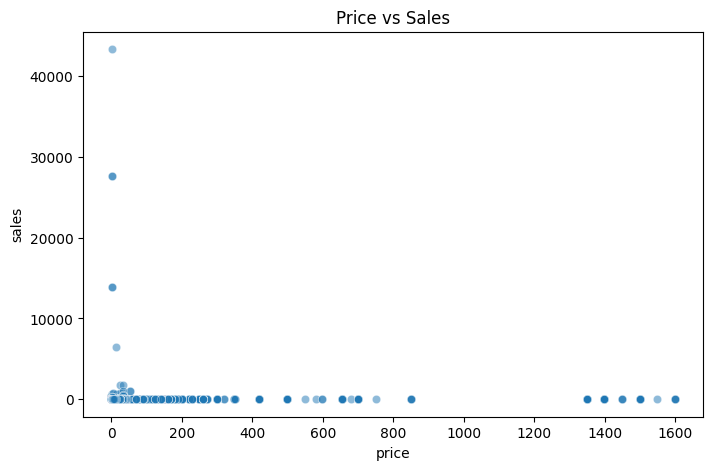

In [11]:
# Relações cruzadas

# Price vs Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_sales[(df_sales['sales'] > 0) & (df_sales['price'] > 0)], x='price', y='sales', alpha=0.5)
plt.title("Price vs Sales")
plt.show()


In [12]:
negative_count = (df_sales['revenue'] < 0).sum()
print("Quantidade de valores negativos em revenue:", negative_count)

Quantidade de valores negativos em revenue: 0


In [13]:
negative_count = (df_sales['price'] < 0).sum()
print("Quantidade de valores negativos em price:", negative_count)

Quantidade de valores negativos em price: 0


In [14]:
negative_count = (df_sales['stock'] < 0).sum()
print("Quantidade de valores negativos em stock:", negative_count)

Quantidade de valores negativos em stock: 0


In [9]:
# analisar se o promo_discount_2 (count)
print(df_sales['promo_discount_2'].value_counts())
# agrupar por promo_discount_2 por promo_bin_1
print(df_sales.groupby('promo_discount_2')['promo_bin_1'].value_counts())

promo_discount_2
20.0    6226
33.0    2804
50.0    2643
35.0     585
40.0     248
16.0     215
Name: count, dtype: int64
promo_discount_2  promo_bin_1
20.0              low            327
                  veryhigh       222
                  verylow        201
33.0              verylow        135
35.0              high           585
40.0              low            116
50.0              moderate       368
                  high            15
Name: count, dtype: int64


## Decisões Cleasing Silver Layer — Tabela Sales

#### 🔹 1. Conversão de tipos
- Conversão da coluna date para tipo datetime (com granularidade até ao dia)
- Garantia de tipos corretos:
    - store_id, product_id paraa .string.lower.strip
    - sales, revenue, price, promo_discount_2 como float
    - stock como int
    - promo_type, promo_bin, promo_discount_type como .string.lower.strip

#### 🔹 2. Tratamento de valores nulos
- `price:
  - Imputado com a mediana do seu product_id. Se ainda nulo após isso (sem registos), preenchido com a mediana global

#### 🔹 3. Remoção de duplicados
- Verificação de unicidade por (store_id, product_id, date)
- Duplicados serão removidos, mantendo a primeira ocorrência

#### 🔹 4. Criação de novas colunas derivadas
- has_promo_1 = 1 se promo_type_1 ≠ 'PR14', 0 caso contrário (assumindo PR14 = sem promoção)

#### 🔹 5. Verificação de consistência de receita
- Validação se revenue ≈ sales × price
- Em caso de inconsistência, recalcular revenue diretamente

---

### ❗ Observações finais

- Esta tabela servirá de base para derivar, na camada Gold:
  - fact_sales = registos com sales > 0
  - fact_snapshot = tabela completa com vendas e stock
- Os dados foram preparados para permitir:
  - Modelagem preditiva de vendas
  - Detecção de ruturas de stock
